Résumé des modifications/ajouts:

- Maintien du type de num_acc et transformation des variables senc, catv, obs, obsm, chox, manv et motor en category

- Conversion de la colonne "annee" au format "date" avec un format à 4 chiffre
s
- Pour les variables senc, obs, obsm, choc, manv, motor : Remplacement des valeurs de la colonne (1, 2, 3, 4, etc) par les libellés correspondants spécifiés dans le référentiel. Non fait à ce stade pour la variale actv (cf. explications ci-après)

- Pour la variable "catv": convertion de la valeur -1 de la colonne 'catv' en NaN + application des regroupements proposés par Stéphane (par grande catégorie de véhicules + par type de permis)
Nota : le contenu de la variable catv n'a pas été remplacée pour le moment. Le regroupement par grande catégorie de véhicule a été effectué dans une colonne ajouté (catv_Label). Même chose pour les regroupements par type de permis : création d'une colonne "permis" pour ne pas écraser les valeurs de la colonne catv à ce stade. A voir ce que l'on retient comme regroupement pour l'appliquer dans la colonne catv

- Maintien de la variable id_vehicule avant fusion

- Pour les variables obs, obsm, choc et manv : Annulation du remplacement des NaN par le mode pour ne pas influer sur les prédictions (suite aux conseils entendues par une prof de Datascientest dans un cours de Deep Learning)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

<h1>Importation des jeux de données</h1>

In [2]:
# Ajout pour import du dataframe sur Google Colab
#from google.colab import files
#import io

In [3]:
# Ajout pour import du dataframe sur Google Colab
#uploaded = files.upload()

In [4]:
#vehicule = pd.read_csv(r"C:\Users\maill\Documents\vehicules.csv",sep=',')
#vehicule.head()

# Affichage du dataframe sur Google Colab
#vehicule = pd.read_csv(io.BytesIO(uploaded["vehicules.csv"]), low_memory=False)
#vehicule.head(10)

In [5]:
vehicule = pd.read_csv('vehicules.csv', low_memory=False)
vehicule.head()

,Unnamed: 0,num_acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,annee,id_vehicule,motor
0,1,200500000001,0.0,7,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN
1,2,200500000001,0.0,7,0.0,0.0,2.0,8.0,10.0,B02,2005,NaN,NaN
2,3,200500000002,0.0,7,0.0,0.0,2.0,7.0,16.0,A01,2005,NaN,NaN
3,4,200500000002,0.0,2,0.0,0.0,2.0,1.0,1.0,B02,2005,NaN,NaN
4,5,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN


In [6]:
#Effectuer la fusion en utilisant la clé commune 'num_acc'+'num_veh'
#fusion = pd.merge(vehicule, usagers, on=['num_acc','num_veh'])

#Afficher le résultat de la fusion
#print(fusion.head())

<h1>Description des variables</h1>

In [7]:
vehicule.drop('Unnamed: 0', axis=1, inplace=True)
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   num_acc      int64  
 1   senc         float64
 2   catv         int64  
 3   occutc       float64
 4   obs          float64
 5   obsm         float64
 6   choc         float64
 7   manv         float64
 8   num_veh      object 
 9   annee        int64  
 10  id_vehicule  object 
 11  motor        float64
dtypes: float64(7), int64(3), object(2)
memory usage: 175.3+ MB


In [8]:
#vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']] = vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']].astype('object')
#vehicule.info()

# Maintien du type de num_acc et transformation des variables senc, catv, obs, obsm, chox, manv et motor en category :
# vehicule[['senc','catv','obs','obsm','choc','manv','motor']] = vehicule[['senc','catv','obs','obsm','choc','manv','motor']].astype('category')

# Vérification
# assert vehicule[['senc','catv','obs','obsm','choc','manv','motor']].dtype == 'category'


# Maintien du type de num_acc et transformation des variables senc, catv, obs, obsm, chox, manv et motor en category
vehicule[['senc','catv','obs','obsm','choc','manv','motor']] = vehicule[['senc','catv','obs','obsm','choc','manv','motor']].astype('category')

# Vérification du type des variables senc, catv, obs, obsm, chox, manv et motor
assert all(vehicule[col].dtype == 'category' for col in ['senc','catv','obs','obsm','choc','manv','motor'])
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype   
---  ------       -----   
 0   num_acc      int64   
 1   senc         category
 2   catv         category
 3   occutc       float64 
 4   obs          category
 5   obsm         category
 6   choc         category
 7   manv         category
 8   num_veh      object  
 9   annee        int64   
 10  id_vehicule  object  
 11  motor        category
dtypes: category(7), float64(1), int64(2), object(2)
memory usage: 85.8+ MB


In [9]:
# Conversion de la colonne "annee" au format "date"
vehicule.annee = pd.to_datetime(vehicule.annee, format='%Y')
vehicule.annee.unique()

array(['2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
# Conversion des valeurs de la colonne 'annee' en une représentation sous forme d'année à quatre chiffres
vehicule.annee = vehicule.annee.apply(lambda date: date.strftime('%Y'))

# Vérification de la transformation
display(vehicule.annee.head())
display(vehicule.annee.tail())

0    2005
1    2005
2    2005
3    2005
4    2005
Name: annee, dtype: object

1914897    2021
1914898    2021
1914899    2021
1914900    2021
1914901    2021
Name: annee, dtype: object

In [11]:
vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']].describe()

,num_acc
count,1.914902e+06
mean,2.012248e+11
std,4.951755e+08
min,2.005000e+11
25%,2.008000e+11
50%,2.012000e+11
75%,2.017000e+11
max,2.021001e+11


In [12]:
vehicule.describe()

,num_acc,occutc
count,1.914902e+06,1.638068e+06
mean,2.012248e+11,8.208511e-02
std,4.951755e+08,2.226700e+00
min,2.005000e+11,0.000000e+00
25%,2.008000e+11,0.000000e+00
50%,2.012000e+11,0.000000e+00
75%,2.017000e+11,0.000000e+00
max,2.021001e+11,9.000000e+02


<h1>Recherche des valeurs manquantes</h1>

In [13]:
vehicule.isnull().sum()

num_acc              0
senc               272
catv                 0
occutc          276834
obs               1006
obsm               778
choc               397
manv               468
num_veh              0
annee                0
id_vehicule    1635811
motor          1635811
dtype: int64

Les colonnes 'motor' et 'id_vehicule' a été ajoutée dans le jeu de données à partir de 2019. Cela explique le nombre de valeurs manquantes.<br>
Les colonnes 'senc', 'obs', 'obsm', 'choc' et 'manv' ont un nombre de valeurs manquantes faible. Selon leur relation avec la variable cible, ces enregistrements pourront soit être supprimés, soit remplacés par le mode de la variable.<br>
Reste à étudier le cas de la colonne 'occutc'

In [14]:
# Calcul du pourcentage de valeurs manquantes par colonne du dataframe "Vehicule"
missing_percentages = vehicule.isnull().sum() / len(vehicule) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)  # Tri par ordre décroissant
print(missing_percentages)

id_vehicule    85.425312
motor          85.425312
occutc         14.456823
obs             0.052535
obsm            0.040629
manv            0.024440
choc            0.020732
senc            0.014204
num_acc         0.000000
catv            0.000000
num_veh         0.000000
annee           0.000000
dtype: float64


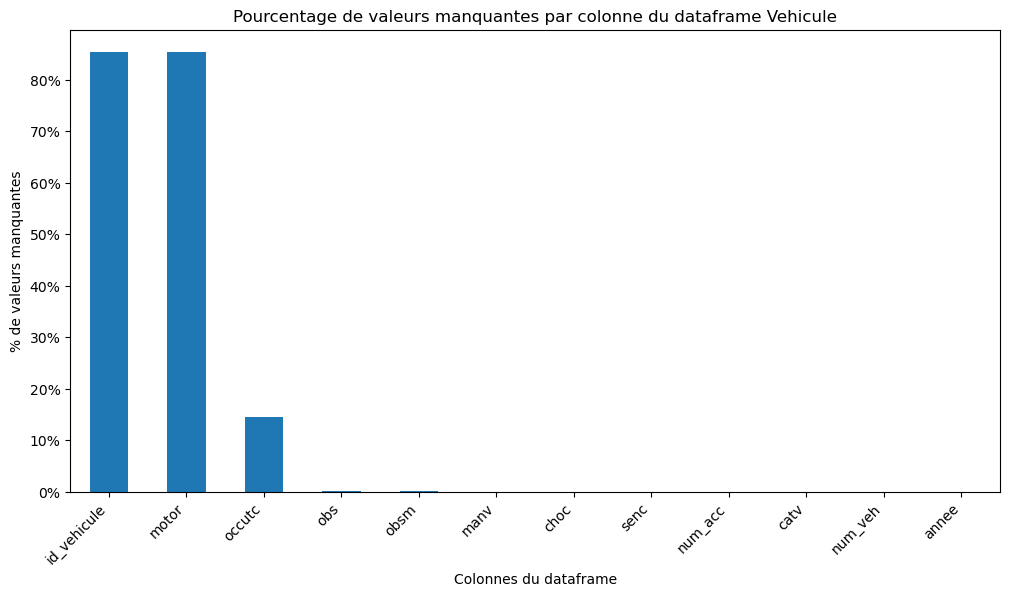

In [15]:
# Graphique représentant le pourcentage de valeurs manquantes par colonne du dataframe "Vehicule"
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar')
plt.title("Pourcentage de valeurs manquantes par colonne du dataframe Vehicule")
plt.xlabel("Colonnes du dataframe")
plt.ylabel('% de valeurs manquantes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes des colonnes
plt.gca().yaxis.set_major_formatter('{:.0f}%'.format)  # Format des étiquettes de l'axe des ordonnées
plt.show()

In [16]:
import missingno as msno ## Plot nullity matrix of Vehicule fig = msno.matrix(Vehicule)

<AxesSubplot:>

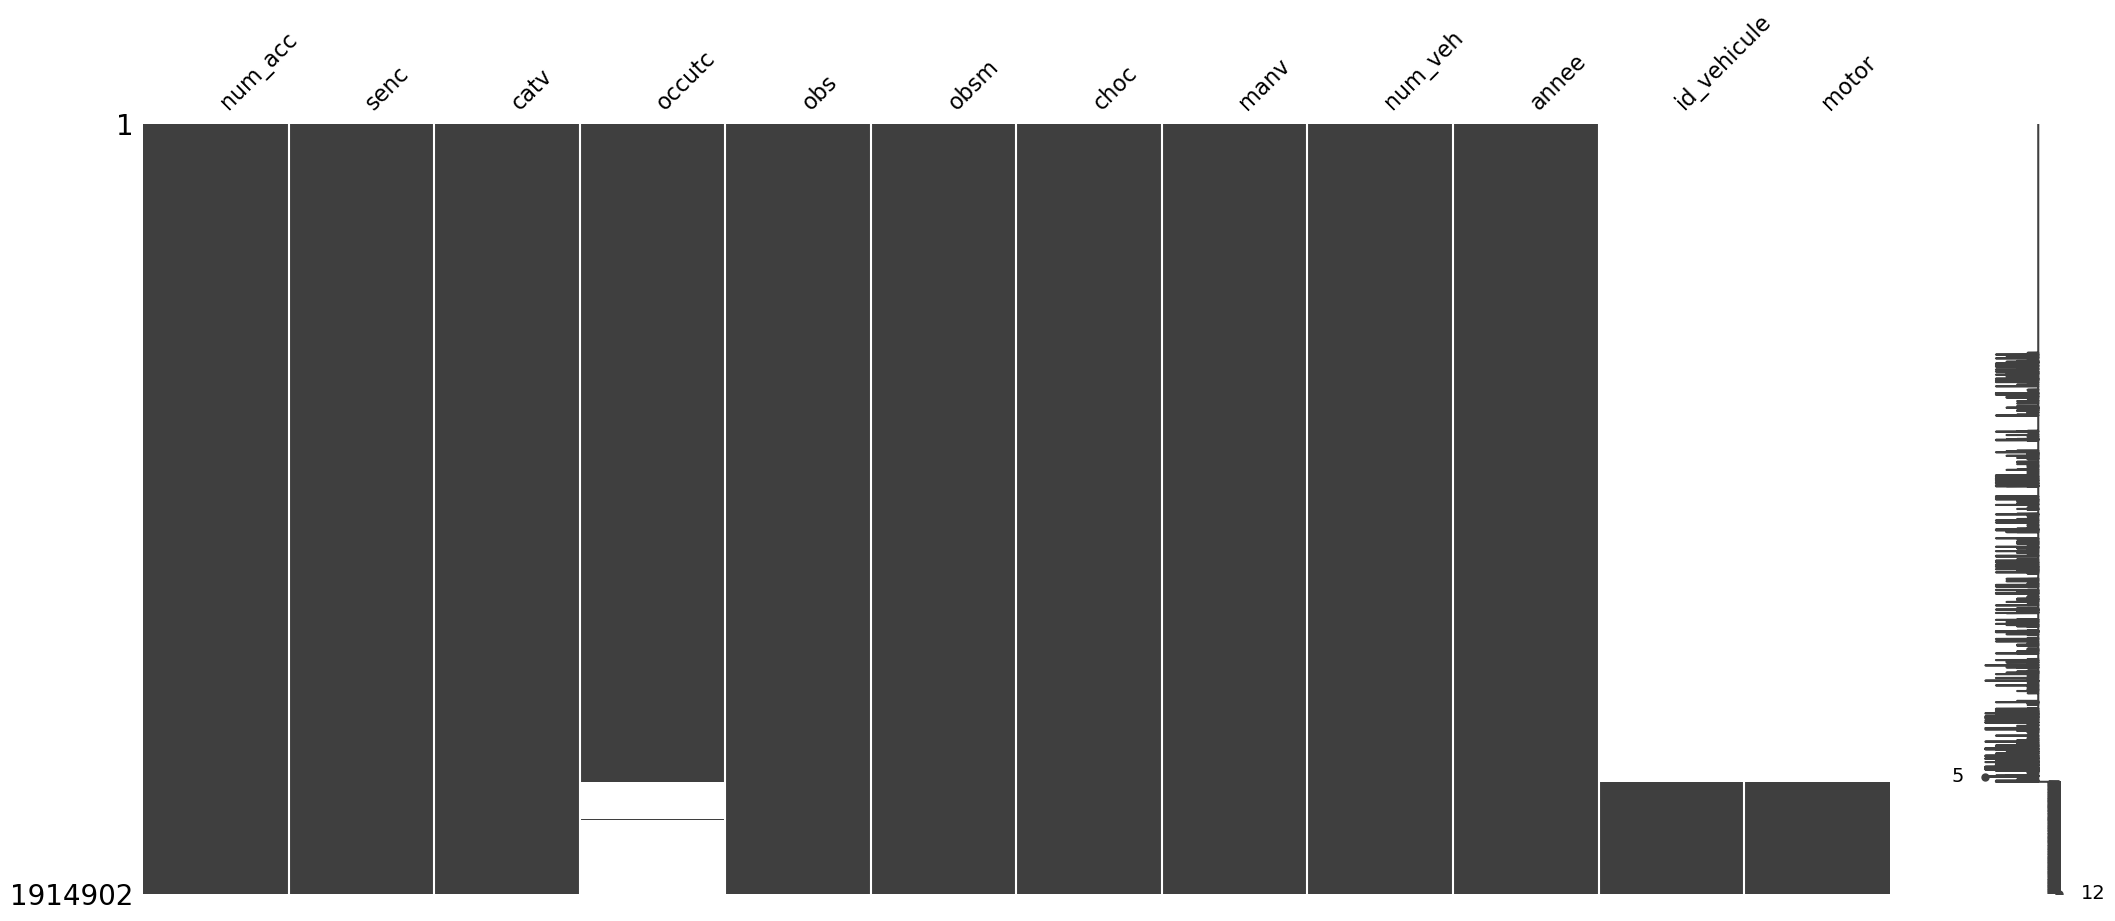

In [17]:
# Affichage de la matrice de nullité :
msno.matrix(vehicule)

In [18]:
# vehicule.drop("id_vehicule", axis=1, inplace=True)
# @Stéphane : maintien de la variable id_vehicule avant fusion

<h1>Distribution des variables</h1>

<h2>Variable 'senc' : Sens de circulation</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnu<br>
1 – PK ou PR ou numéro d’adresse postale croissant<br>
2 – PK ou PR ou numéro d’adresse postale décroissant<br>
3 – Absence de repère<br>

In [19]:
# Remplacement les valeurs de la colonne 'senc' par les correspondances spécifiées ci-avant :
correspondances_senc = {
    -1: "Non renseigné",
    0: "Inconnu",
    1: "PK ou PR ou numéro d’adresse postale croissant",
    2: "PK ou PR ou numéro d’adresse postale décroissant",
    3: "Absence de repère"
}

vehicule['senc'] = vehicule['senc'].replace(correspondances_senc)

In [20]:
vehicule['senc'].value_counts()

Inconnu                                             1378592
PK ou PR ou numéro d’adresse postale croissant       298409
PK ou PR ou numéro d’adresse postale décroissant     196999
Absence de repère                                     39630
Non renseigné                                          1000
Name: senc, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Non renseigné'),
  Text(1, 0, 'Inconnu'),
  Text(2, 0, 'PK ou PR ou numéro d’adresse postale croissant'),
  Text(3, 0, 'PK ou PR ou numéro d’adresse postale décroissant'),
  Text(4, 0, 'Absence de repère')])

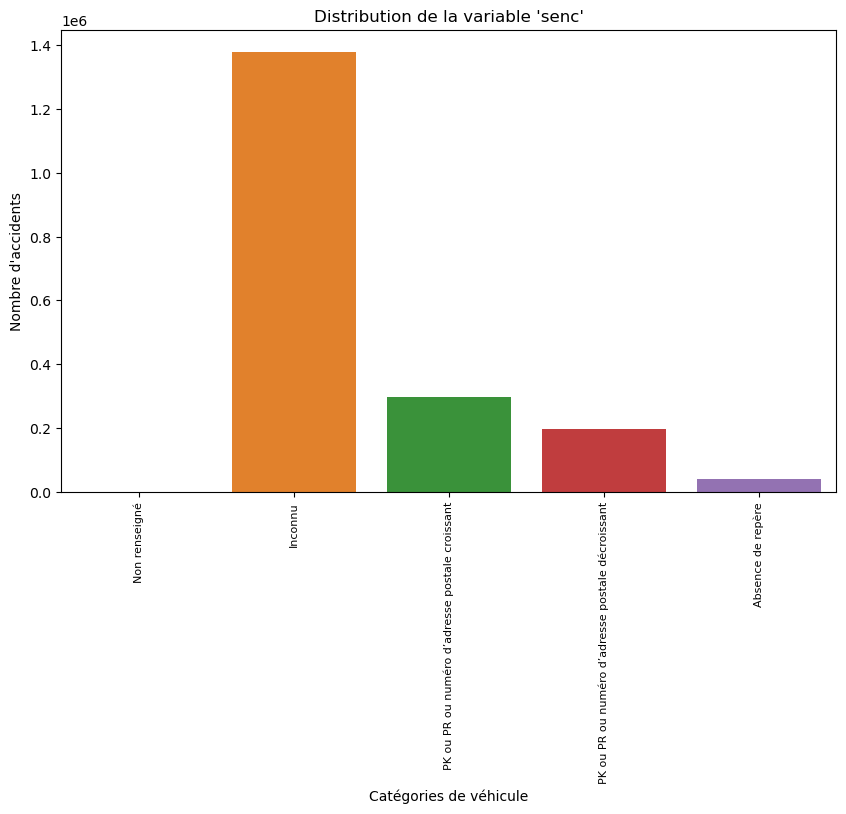

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='senc',data=vehicule, ax=ax);
plt.title("distribution de la variable 'senc'")

plt.title("Distribution de la variable 'senc'")
plt.xlabel('Catégories de véhicule')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

Les valeurs 0, -1 et 3 n'apportent pas d'informations significatives et représentent la grande majorité des données.<br>
Les valeurs 1 et 2 indiquent la direction dans laquelle le véhicule se dirigeait(Paris-Orléans ou Orléans-Paris), plutôt que s'il se trouvait en sens contraire.<br>
<b>Avis métier</b> : Cette variable ne semble pas être pertinente pour la prédiction de la gravité. En effet, la direction du véhicule (Paris-Orléans ou Orléans-Paris) n'a pas d'importance tant que le véhicule se trouve du bon côté de la route.

<h2>Variable 'catv' : Catégorie de véhicule</h2><br>
descriptif des modalités :<br>
00 – Indéterminable<br>
01 – Bicyclette<br>
02 – Cyclomoteur <50cm3<br>
03 – Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")<br>
04 – Référence inutilisée depuis 2006 (scooter immatriculé)<br>
05 – Référence inutilisée depuis 2006 (motocyclette)<br>
06 – Référence inutilisée depuis 2006 (side-car)<br>
07 – VL seul<br>
08 – Référence inutilisée depuis 2006 (VL + caravane)<br>
09 – Référence inutilisée depuis 2006 (VL + remorque)<br>
10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC
<= 3,5T)<br>
11 – Référence inutilisée depuis 2006 (VU (10) + caravane)<br>
12 – Référence inutilisée depuis 2006 (VU (10) + remorque)<br>
13 – PL seul 3,5T <PTCA <= 7,5T<br>
14 – PL seul > 7,5T<br>
15 – PL > 3,5T + remorque<br>
16 – Tracteur routier seul<br>
17 – Tracteur routier + semi-remorque<br>
18 – Référence inutilisée depuis 2006 (transport en commun)<br>
19 – Référence inutilisée depuis 2006 (tramway)<br>
20 – Engin spécial<br>
21 – Tracteur agricole<br>
30 – Scooter < 50 cm3<br>
31 – Motocyclette > 50 cm3 et <= 125 cm3<br>
32 – Scooter > 50 cm3 et <= 125 cm3<br>
33 – Motocyclette > 125 cm3<br>
34 – Scooter > 125 cm3<br>
35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)<br>
36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)<br>
37 – Autobus<br>
38 – Autocar<br>
39 – Train<br>
40 – Tramway<br>
41 – 3RM <= 50 cm3<br>
42 – 3RM > 50 cm3 <= 125 cm3<br>
43 – 3RM > 125 cm3<br>
50 – EDP à moteur<br>
60 – EDP sans moteur<br>
80 – VAE<br>
99 – Autre véhicule<br>

In [22]:
vehicule['catv'].value_counts()

7     1182228
33     136738
10     100574
2       98409
1       83565
30      74315
32      39488
31      38736
5       21816
34      20219
14      19109
15      16378
17      15327
37      12332
99       7878
3        7566
4        7463
13       7243
21       3942
38       3316
50       3029
36       2401
40       2180
18       2075
20       2073
43       1383
80       1113
16        864
0         757
60        553
35        506
39        474
9         300
19        183
8         120
12         79
42         65
41         40
6          39
11         17
-1          9
Name: catv, dtype: int64

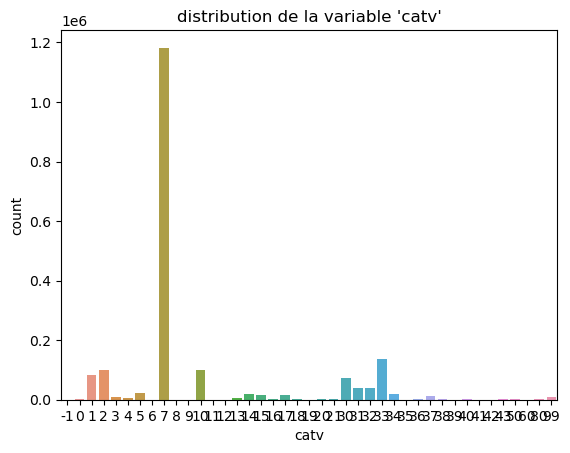

In [23]:
sns.countplot(x='catv', data=vehicule)
plt.title("distribution de la variable 'catv'");

La grande majorité des accidents concerne des véhicules légers, principalement des voitures. Il existe de nombreuses catégories définies, dont certaines ne sont plus utilisées. Il serait judicieux de simplifier <b>en regroupant certaines catégories</b>.

In [24]:
# Visualisation de la liste des valeurs uniques présentes dans la colonne 'catv'
catv_uniques = vehicule['catv'].unique()
print(catv_uniques)

[7, 2, 9, 5, 18, ..., 60, 0, 43, 41, -1]
Length: 41
Categories (41, int64): [-1, 0, 1, 2, ..., 50, 60, 80, 99]


In [25]:
# Convertir la valeur -1 de la colonne 'catv' en NaN
vehicule['catv'].replace("-1", np.nan, inplace=True)
count = vehicule['catv'].value_counts()
print(count)

7     1182228
33     136738
10     100574
2       98409
1       83565
30      74315
32      39488
31      38736
5       21816
34      20219
14      19109
15      16378
17      15327
37      12332
99       7878
3        7566
4        7463
13       7243
21       3942
38       3316
50       3029
36       2401
40       2180
18       2075
20       2073
43       1383
80       1113
16        864
0         757
60        553
35        506
39        474
9         300
19        183
8         120
12         79
42         65
41         40
6          39
11         17
-1          9
Name: catv, dtype: int64


In [26]:
# Convertir les valeurs de la colonne 'catv' en chaînes de caractères pour permettre l'affichage du nom de chaque catégorie de véhicule
vehicule['catv'] = vehicule['catv'].astype(str)

In [27]:
# Regroupement modifié pour la variable catv
correspondances = {'0': 'Indéterminable',
    '1': 'Bicyclette',
    '2': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '3': 'Voiturette',
    '4': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '5': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '6': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '7': 'Voitures légères (VL) seule',
    '8': 'Voitures légères (VL) avec carane ou remorque tractée',
    '9': 'Voitures légères (VL) avec carane ou remorque tractée',
    '10': 'Véhicules utilitaires légers (VU)',
    '11': 'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
    '12': 'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
    '13': 'Poids lourds (PL) et camions',
    '14': 'Poids lourds (PL) et camions',
    '15': 'Poids lourds (PL) et camions',
    '16': 'Tracteurs routiers',
    '17': 'Tracteurs routiers',
    '18': 'Autobus et autocars',
    '19': 'Tramway',
    '20': 'Tracteurs agricoles et engins spéciaux',
    '21': 'Tracteurs agricoles et engins spéciaux',
    '30': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '31': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '32': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '33' : 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '34': 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '35': 'Quad',
    '36': 'Quad',
    '37': 'Autobus et autocars',
    '38': 'Autobus et autocars',
    '39': 'Train',
    '40': 'Tramway',
    '41': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '42': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '43': 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '50': 'Engins de déplacement personnels (EDP) à moteur (ex: trotinette)',
    '60': "Engins de déplacement personnels (EDP) sans moteur (ex : skateboards, roller, trottinette)",
    '80': 'Vélo avec assistance électrique (VAE)',
    '99': 'Autre véhicule'}

# Création d'une nouvelle colonne catv_Label pour intégrer les regroupements effectués mais sans écraser les valeurs de la variable catv
vehicule['catv_Label'] = vehicule['catv'].map(correspondances)

# Afficher le résultat
print(vehicule['catv_Label'])

0                                Voitures légères (VL) seule
1                                Voitures légères (VL) seule
2                                Voitures légères (VL) seule
3          Deux ou trois roues de petite cylindrée (<= 50...
4          Deux ou trois roues de petite cylindrée (<= 50...
                                 ...                        
1914897                          Voitures légères (VL) seule
1914898                          Voitures légères (VL) seule
1914899                          Voitures légères (VL) seule
1914900                          Voitures légères (VL) seule
1914901                          Voitures légères (VL) seule
Name: catv_Label, Length: 1914902, dtype: object


In [28]:
vehicule['catv_Label'].dtype

dtype('O')

In [29]:
vehicule['catv_Label'] = vehicule['catv_Label'].astype('category')
assert vehicule['catv_Label'].dtype == 'category'

In [30]:
vehicule['catv_Label'].cat.categories

Index(['Autobus et autocars', 'Autre véhicule', 'Bicyclette',
       'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
       'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
       'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
       'Engins de déplacement personnels (EDP) sans moteur (ex : skateboards, roller, trottinette)',
       'Engins de déplacement personnels (EDP) à moteur (ex: trotinette)',
       'Indéterminable', 'Poids lourds (PL) et camions', 'Quad',
       'Tracteurs agricoles et engins spéciaux', 'Tracteurs routiers', 'Train',
       'Tramway', 'Voitures légères (VL) avec carane ou remorque tractée',
       'Voitures légères (VL) seule', 'Voiturette',
       'Véhicules utilitaires légers (VU)',
       'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
       'Vélo avec assistance électrique (VAE)'],
      dtype='object')

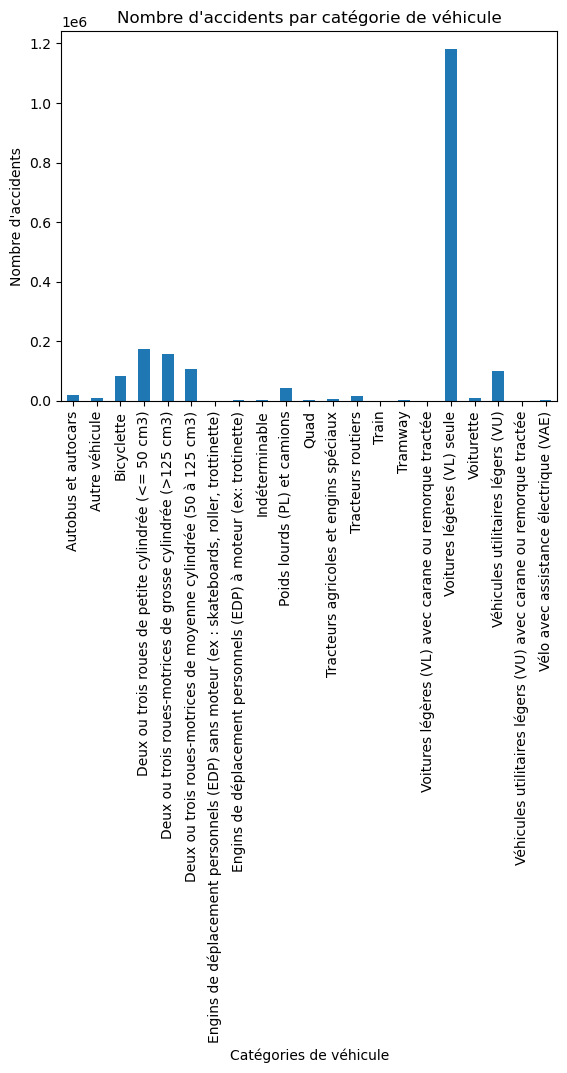

In [31]:
# Le nbre d'accidents par chaque catégorie de véhicule (catv)
counts = vehicule['catv_Label'].value_counts()

# Tri par categorie de vehicule
counts = counts.sort_index()

# Distribution des catégories de vehicule sous forme de graphe
counts.plot(kind='bar')

plt.title("Nombre d'accidents par catégorie de véhicule")
plt.xlabel('Catégories de véhicule')
plt.ylabel("Nombre d'accidents")

plt.show()

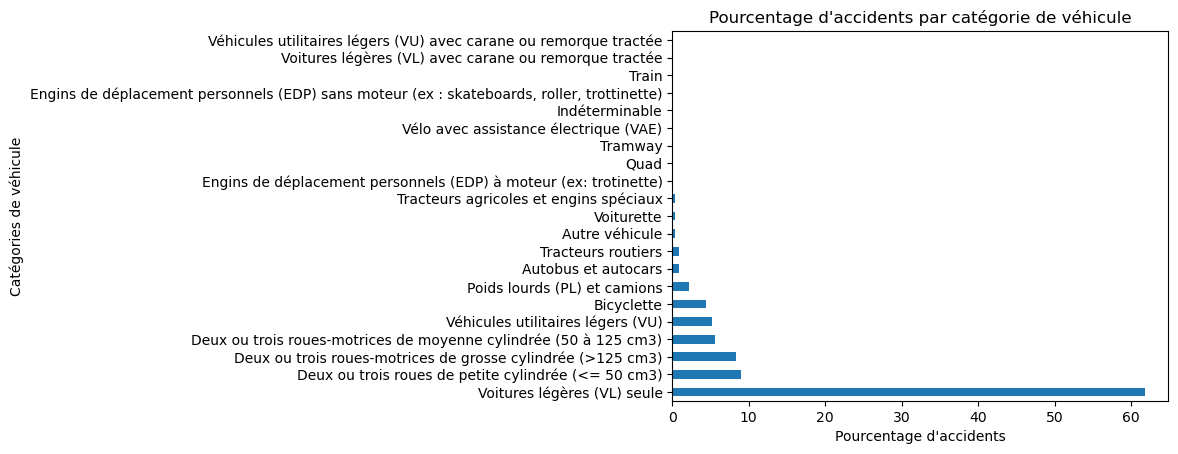

In [32]:
percentages = (vehicule['catv_Label'].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Distribution des catégories de véhicule sous forme de graphe
percentages.plot(kind='barh')  # Utilisation de 'barh' pour obtenir une rotation

plt.title("Pourcentage d'accidents par catégorie de véhicule")
plt.xlabel("Pourcentage d'accidents")
plt.ylabel('Catégories de véhicule')

plt.show()

Catégorie de permis nécessaire pour conduire chaque type de véhicule :

01 – Bicyclette : Aucun permis requis.

02 – Cyclomoteur <50cm3 : Permis AM ou permis B.

03 – Voiturette (Quadricycle à moteur carrossé) : Permis B1.

04 – Référence inutilisée depuis 2006 (scooter immatriculé) :
Permis A1 (permis moto léger) ou Permis A2 (permis moto intermédiaire) ou Permis A (permis moto toutes catégories) en fonction de la cylindrée du scooter.

05 – Référence inutilisée depuis 2006 (motocyclette) :
Permis A1 (permis moto léger) pour les motocyclettes de puissance limitée, Permis A2 (permis moto intermédiaire) pour les motocyclettes de puissance intermédiaire, Permis A (permis moto toutes catégories) pour les motocyclettes de puissance illimitée.

06 – Référence inutilisée depuis 2006 (side-car) :  
Permis A1 (permis moto léger) ou Permis A2 (permis moto intermédiaire) ou Permis A (permis moto toutes catégories) en fonction de la puissance du side-car.

07 – VL seul : Permis B.

08 – Référence inutilisée depuis 2006 (VL + caravane) :
*** Si le PTAC du véhicule combiné est inférieur ou égal à 3,5 tonnes, le permis B est suffisant. Le permis B permet de conduire les voitures légères et les véhicules avec une remorque dont le PTAC ne dépasse pas 750 kg ou lorsque la somme du PTAC du véhicule tracteur et de la remorque ne dépasse pas 3,5 tonnes.
*** Cependant, si le PTAC (poids total en charge) du véhicule combiné dépasse 3,5 tonnes, un permis spécifique est nécessaire. Dans ce cas, il peut être requis d'obtenir un permis de conduire de la catégorie B+E, qui autorise la conduite d'un véhicule léger avec une remorque dont le PTAC dépasse 750 kg et dont la somme du PTAC du véhicule tracteur et de la remorque dépasse 3,5 tonnes.

09 – Référence inutilisée depuis 2006 (VL + remorque) :
*** Si le PTAC du véhicule combiné est inférieur ou égal à 3,5 tonnes, le permis B est suffisant. Le permis B permet de conduire les voitures légères et les véhicules avec une remorque dont le PTAC ne dépasse pas 750 kg ou lorsque la somme du PTAC du véhicule tracteur et de la remorque ne dépasse pas 3,5 tonnes.
*** Cependant, si le PTAC (poids total en charge) du véhicule combiné dépasse 3,5 tonnes, un permis spécifique est nécessaire. Dans ce cas, il peut être requis d'obtenir un permis de conduire de la catégorie B+E, qui autorise la conduite d'un véhicule léger avec une remorque dont le PTAC dépasse 750 kg et dont la somme du PTAC du véhicule tracteur et de la remorque dépasse 3,5 tonnes.

10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque : Permis B.

11 – Référence inutilisée depuis 2006 (VU (10) + caravane) : cf. 08 et 09

12 – Référence inutilisée depuis 2006 (VU (10) + remorque) : cf. 08 et 09

13 – PL seul 3,5T <PTCA <= 7,5T : Permis C1.

14 – PL seul > 7,5T : Permis C.

15 – PL > 3,5T + remorque : Permis C.

16 – Tracteur routier seul : Permis CE.

17 – Tracteur routier + semi-remorque : Permis CE.

18 – Référence inutilisée depuis 2006 (transport en commun) :
Le permis D est spécifique aux conducteurs de véhicules de transport en commun. Il permet de conduire des véhicules de plus de 8 places assises (en plus du conducteur) et dont la capacité de transport dépasse 16 personnes.

19 – Référence inutilisée depuis 2006 (tramway) : Permis B

20 – Engin spécial : Permis B ou permis C selon la catégorie.

21 – Tracteur agricole : Permis B ou permis C selon la catégorie.

30 – Scooter < 50 cm3 : Permis AM (anciennement BSR) ou permis B.

31 – Motocyclette > 50 cm3 et <= 125 cm3 : Permis A1 ou permis A2.

32 – Scooter > 50 cm3 et <= 125 cm3 : Permis A1 ou permis A2.

33 – Motocyclette > 125 cm3 : Permis A.

34 – Scooter > 125 cm3 : Permis A.

35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé) : Permis AM ou permis B.

36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé) : Permis A ou permis B avec formation complémentaire.

37 – Autobus : Permis D.

38 – Autocar : Permis D.

39 – Train : Accréditation spécifique

40 – Tramway : Permis B.

41 – 3RM <= 50 cm3 : Permis AM ou permis B.

42 – 3RM > 50 cm3 <= 125 cm3 : Permis A1 ou permis A2.

43 – 3RM > 125 cm3 : Permis A.

50 – EDP à moteur : Permis B ou permis C selon la catégorie

60 – EDP sans moteur : Aucun permis

80 – VAE : : Aucun permis

99 – Autre véhicule : permis selon la catégorie

**En résumé, catégorie de permis nécessaire pour conduire chaque type de véhicule :**

01 : Aucun permis

02 : Permis AM ou B

03 : Permis B1

04 :  Permis A1 ou A2 ou A

05 : Permis A1 ou A2 ou A

06 : Permis A1 ou A

07 : Permis B

08 : Permis B ou B+E  

09 : Permis B ou B+E

10 : Permis B

11 : Permis B ou B+E

12 : Permis B ou B+E  

13 : Permis C1

14 : Permis C

15 : Permis C

16 : Permis CE

17 : Permis CE

18 : Permis D

19 : Permis B

20 : Permis B ou C

21 : Permis B ou C

30 : Permis AM ou B

31 : Permis A1 ou A2

32 : Permis A1 ou A2

33 : Permis A

34 : Permis A

35 : Permis AM ou B

36 : Permis AM ou B avec formation complémentaire

37 : Permis D

38 : Permis D

39 : Accréditation spécifique

40 : Permis B

41 : Permis AM ou permis B

42 : Permis A1 ou A2

43 : Permis A

50 : Permis B ou C

60 : Aucun permis

80 : Aucun permis

99 : Permis selon la catégorie


In [33]:
correspondances = {
    '1': 'Aucun permis',
    '2': 'Permis AM ou B',
    '3': 'Permis B1',
    '4': 'Permis A1 ou A2 ou A',
    '5': 'Permis A1 ou A2 ou A',
    '6': 'Permis A1 ou A',
    '7': 'Permis B',
    '8': 'Permis B ou B+E',
    '9': 'Permis B ou B+E',
    '10': 'Permis B',
    '11': 'Permis B ou B+E',
    '12': 'Permis B ou B+E',
    '13': 'Permis C1',
    '14': 'Permis C',
    '15': 'Permis C',
    '16': 'Permis CE',
    '17': 'Permis CE',
    '18': 'Permis D',
    '19': 'Permis B',
    '20': 'Permis B ou C',
    '21': 'Permis B ou C',
    '30': 'Permis AM ou B',
    '31': 'Permis A1 ou A2',
    '32': 'Permis A1 ou A2',
    '33': 'Permis A',
    '34': 'Permis A',
    '35': 'Permis AM ou B',
    '36': 'Permis AM ou B avec formation complémentaire',
    '37': 'Permis D',
    '38': 'Permis D',
    '39': 'Accréditation spécifique',
    '40': 'Permis B',
    '41': 'Permis AM ou B',
    '42': 'Permis A1 ou A2',
    '43': 'Permis A',
    '50': 'Permis B ou C',
    '60': 'Aucun permis',
    '80': 'Aucun permis',
    '99': 'Permis selon la catégorie'
}

vehicule['permis'] = vehicule['catv'].replace(correspondances)


In [34]:
vehicule['permis'].dtype

dtype('O')

In [35]:
vehicule['permis'] = vehicule['permis'].astype('category')
assert vehicule['permis'].dtype == 'category'

In [36]:
vehicule['permis'].cat.categories

Index(['-1', '0', 'Accréditation spécifique', 'Aucun permis', 'Permis A',
       'Permis A1 ou A', 'Permis A1 ou A2', 'Permis A1 ou A2 ou A',
       'Permis AM ou B', 'Permis AM ou B avec formation complémentaire',
       'Permis B', 'Permis B ou B+E', 'Permis B ou C', 'Permis B1', 'Permis C',
       'Permis C1', 'Permis CE', 'Permis D', 'Permis selon la catégorie'],
      dtype='object')

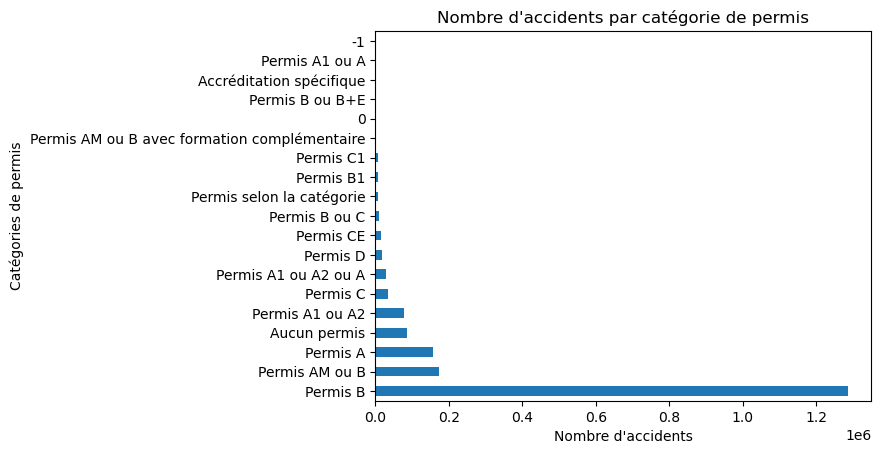

In [37]:
counts = vehicule['permis'].value_counts()

# Tri par catégorie de permis et ordre décroissant
counts = counts.sort_values(ascending=False)

# Distribution des catégories de permis sous forme de graphe
counts.plot(kind='barh')

plt.title("Nombre d'accidents par catégorie de permis")
plt.xlabel("Nombre d'accidents")
plt.ylabel('Catégories de permis')

plt.show()


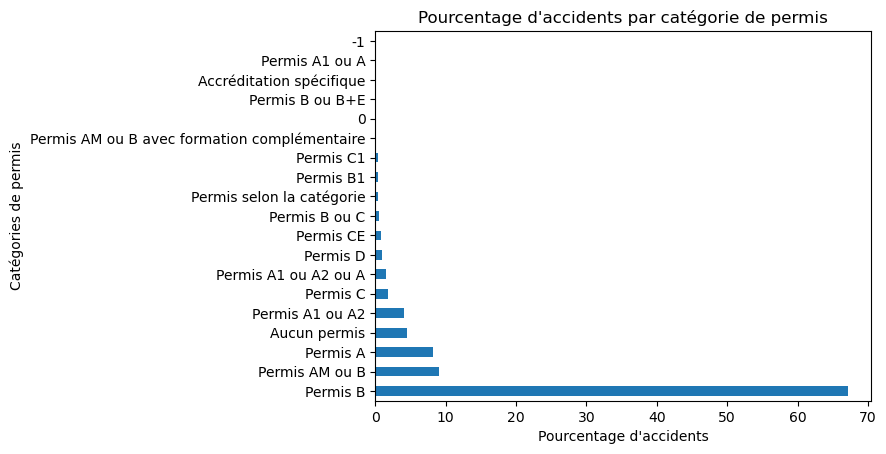

In [38]:
percentages = (vehicule['permis'].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Distribution des catégories de permis sous forme de graphe
percentages.plot(kind='barh')

plt.title("Pourcentage d'accidents par catégorie de permis")
plt.xlabel("Pourcentage d'accidents")
plt.ylabel('Catégories de permis')

plt.show()



In [39]:
# Nombre d'occupants par catégorie de vehicule
occupants_par_catv = vehicule.groupby('catv')['occutc'].apply(lambda x: x.isnull().sum())
occupants_par_catv = occupants_par_catv.sort_values(ascending=False)
print(occupants_par_catv)

catv
7     165407
33     22057
10     18834
1      15636
2      10778
30      9005
32      6542
31      5111
34      3170
50      3029
15      2736
17      2076
14      2070
3       1787
43      1383
99      1317
80      1113
13      1093
0        757
21       728
60       553
36       489
20       426
40       354
16       108
39        92
35        69
42        65
41        40
-1         9
18         0
9          0
19         0
8          0
11         0
37         0
6          0
12         0
38         0
4          0
5          0
Name: occutc, dtype: int64


In [40]:
vehicule.groupby('catv').agg({'occutc':['count','mean']})

occutc           
        count       mean
catv                    
-1          0        NaN
0           0        NaN
1       67929   0.000000
10      81740   0.000122
11         17   0.000000
12         79   0.000000
13       6150   0.000000
14      17039   0.000235
15      13642   0.000000
16        756   0.000000
17      13251   0.000226
18       2075   6.747952
19        183   0.000000
2       87631   0.000000
20       1647   0.000000
21       3214   0.000000
3        5779   0.000000
30      65310   0.002955
31      33625   0.000000
32      32946   0.000030
33     114681   0.006645
34      17049   0.000235
35        437   0.029748
36       1912   0.000000
37      12332   5.866364
38       3316   7.237636
39        382  13.358639
4        7463   0.013399
40       1826   8.934830
41          0        NaN
42          0        NaN
43          0        NaN
5       21816   0.000000
50          0        NaN
6          39   0.000000
60          0        NaN
7     1016821   0.001578
8         120   0.000000
80          0        NaN
9         300   0.000000
99       6561   0.000305

L'intérêt de cette variable doit être étudié, car elle est censée représenter le nombre d'occupants dans un transport en commun impliqué dans un accident. Cependant, des valeurs sont présentes pour de nombreuses autres catégories de véhicules. Il est possible que cette variable ait été mal renseignée par les forces de l'ordre.

In [41]:
# Nombre d'occupants par catégorie de vehicule (en utilisant la variable catv_Label comprenant les regroupements de véhicules)
occupants_par_catv = vehicule.groupby('catv_Label')['occutc'].apply(lambda x: x.isnull().sum())
occupants_par_catv = occupants_par_catv.sort_values(ascending=False)
print(occupants_par_catv)

catv_Label
Voitures légères (VL) seule                                                                   165407
Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)                                    26610
Deux ou trois roues de petite cylindrée (<= 50 cm3)                                            19823
Véhicules utilitaires légers (VU)                                                              18834
Bicyclette                                                                                     15636
Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)                               11718
Poids lourds (PL) et camions                                                                    5899
Engins de déplacement personnels (EDP) à moteur (ex: trotinette)                                3029
Tracteurs routiers                                                                              2184
Voiturette                                                                      

In [42]:
vehicule.groupby('catv_Label').agg({'occutc':['count','mean']})

occutc           
                                                      count       mean
catv_Label                                                            
Autobus et autocars                                   17723   6.226147
Autre véhicule                                         6561   0.000305
Bicyclette                                            67929   0.000000
Deux ou trois roues de petite cylindrée (<= 50 ...   152941   0.001262
Deux ou trois roues-motrices de grosse cylindré...   131730   0.005815
Deux ou trois roues-motrices de moyenne cylindr...    95889   0.001053
Engins de déplacement personnels (EDP) sans mot...        0        NaN
Engins de déplacement personnels (EDP) à moteur...        0        NaN
Indéterminable                                            0        NaN
Poids lourds (PL) et camions                          36831   0.000109
Quad                                                   2349   0.005534
Tracteurs agricoles et engins spéciaux                 4861   0.000000
Tracteurs routiers                                    14007   0.000214
Train                                                   382  13.358639
Tramway                                                2009   8.120956
Voitures légères (VL) avec carane ou remorque t...      420   0.000000
Voitures légères (VL) seule                         1016821   0.001578
Voiturette                                             5779   0.000000
Véhicules utilitaires légers (VU)                     81740   0.000122
Véhicules utilitaires légers (VU) avec carane o...       96   0.000000
Vélo avec assistance électrique (VAE)                     0        NaN

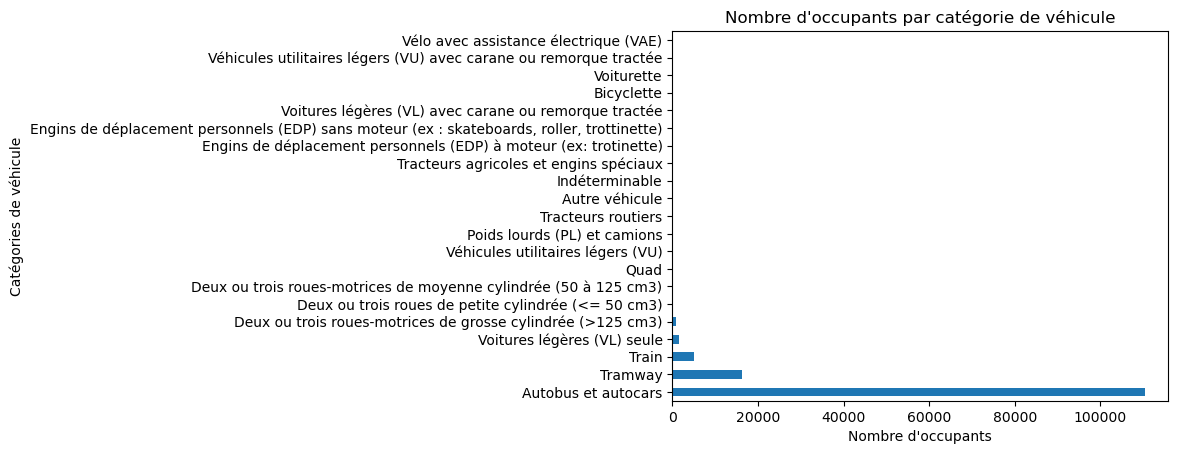

In [43]:
occupants_counts = vehicule.groupby('catv_Label')['occutc'].sum()

# Tri par catégorie de véhicule et ordre décroissant
occupants_counts = occupants_counts.sort_values(ascending=False)

# Distribution du nombre d'occupants par catégorie de véhicule sous forme de graphe
occupants_counts.plot(kind='barh')  # Utilisation de 'barh' pour obtenir une rotation

plt.title("Nombre d'occupants par catégorie de véhicule")
plt.xlabel("Nombre d'occupants")
plt.ylabel("Catégories de véhicule")

plt.show()



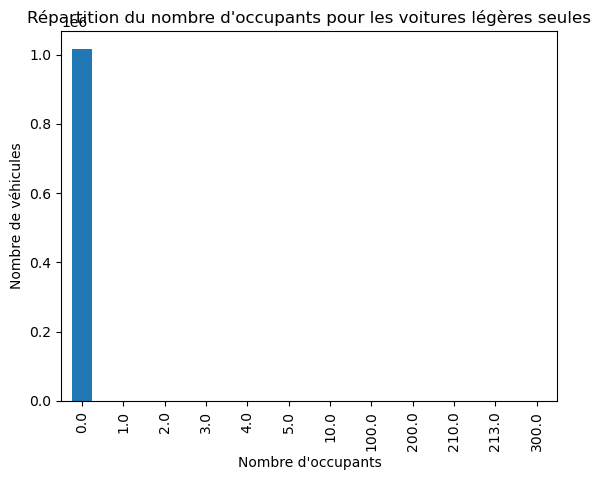

In [44]:
# Filtre des données pour la catégorie spécifique "'Voitures légères (VL) seule"
filtered_data = vehicule[vehicule['catv_Label'] == 'Voitures légères (VL) seule']

# Calcul du nombre d'occupants pour la catégorie spécifique
occupants_counts = filtered_data['occutc'].value_counts().sort_index()

# Distribution du nombre d'occupants pour la catégorie spécifique sous forme de graphe
occupants_counts.plot(kind='bar')

plt.title("Répartition du nombre d'occupants pour les voitures légères seules")
plt.xlabel("Nombre d'occupants")
plt.ylabel("Nombre de véhicules")

plt.show()


In [45]:
# Filtre des données pour la catégorie 'Voitures légères (VL) seule'
filtered_data = vehicule[vehicule['catv_Label'] == 'Voitures légères (VL) seule']

# Sélection uniquement de la colonne occutc
occupants_data = filtered_data['occutc']

# Comptage du nombre d'occurrences pour chaque valeur et tri par ordre décroissant
occupants_counts = occupants_data.value_counts().sort_index(ascending=False)

# Affichage de la liste décroissante des valeurs du nombre d'occupants
occupants_counts = occupants_counts.reset_index()
occupants_counts.columns = ['Nombre d\'occupants', 'Nombre de véhicules']
occupants_counts = occupants_counts.sort_values(by='Nombre d\'occupants', ascending=False)
print(occupants_counts)


    Nombre d'occupants  Nombre de véhicules
0                300.0                    1
1                213.0                    1
2                210.0                    1
3                200.0                    3
4                100.0                    2
5                 10.0                    1
6                  5.0                    3
7                  4.0                    1
8                  3.0                    1
9                  2.0                    9
10                 1.0                   32
11                 0.0              1016766


<h2>Variable 'obs' : Obstacle fixe heurté</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Sans objet<br>
1 – Véhicule en stationnement<br>
2 – Arbre<br>
3 – Glissière métallique<br>
4 – Glissière béton<br>
5 – Autre glissière<br>
6 – Bâtiment, mur, pile de pont<br>
7 – Support de signalisation verticale ou poste d’appel d’urgence<br>
8 – Poteau<br>
9 – Mobilier urbain<br>
10 – Parapet<br>
11 – Ilot, refuge, borne haute<br>
12 – Bordure de trottoir<br>
13 – Fossé, talus, paroi rocheuse<br>
14 – Autre obstacle fixe sur chaussée<br>
15 – Autre obstacle fixe sur trottoir ou accotement<br>
16 – Sortie de chaussée sans obstacle<br>
17 – Buse – tête d’aqueduc<br>

In [46]:
correspondances_obs = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Véhicule en stationnement, Arbre",
    2: "Glissière métallique",
    3: "Glissière béton",
    4: "Autre glissière",
    5: "Bâtiment, mur, pile de pont",
    6: "Support de signalisation verticale ou poste d’appel d’urgence",
    7: "Poteau",
    8: "Mobilier urbain",
    9: "Parapet",
    10: "Ilot, refuge, borne haute",
    11: "Bordure de trottoir",
    12: "Fossé, talus, paroi rocheuse",
    13: "Autre obstacle fixe sur chaussée",
    14: "Autre obstacle fixe sur trottoir ou accotement",
    15: "Sortie de chaussée sans obstacle",
    16: "Buse – tête d’aqueduc"
}

vehicule['obs'] = vehicule['obs'].replace(correspondances_obs)

In [47]:
vehicule['obs'].value_counts()

Sans objet                                                       1660449
Véhicule en stationnement, Arbre                                   41945
Autre obstacle fixe sur chaussée                                   32383
Glissière métallique                                               27477
Autre glissière                                                    22485
Glissière béton                                                    21884
Support de signalisation verticale ou poste d’appel d’urgence      21207
Mobilier urbain                                                    20162
Autre obstacle fixe sur trottoir ou accotement                     14120
Fossé, talus, paroi rocheuse                                       11364
Buse – tête d’aqueduc                                              10210
Sortie de chaussée sans obstacle                                    9352
Parapet                                                             6546
Poteau                                             

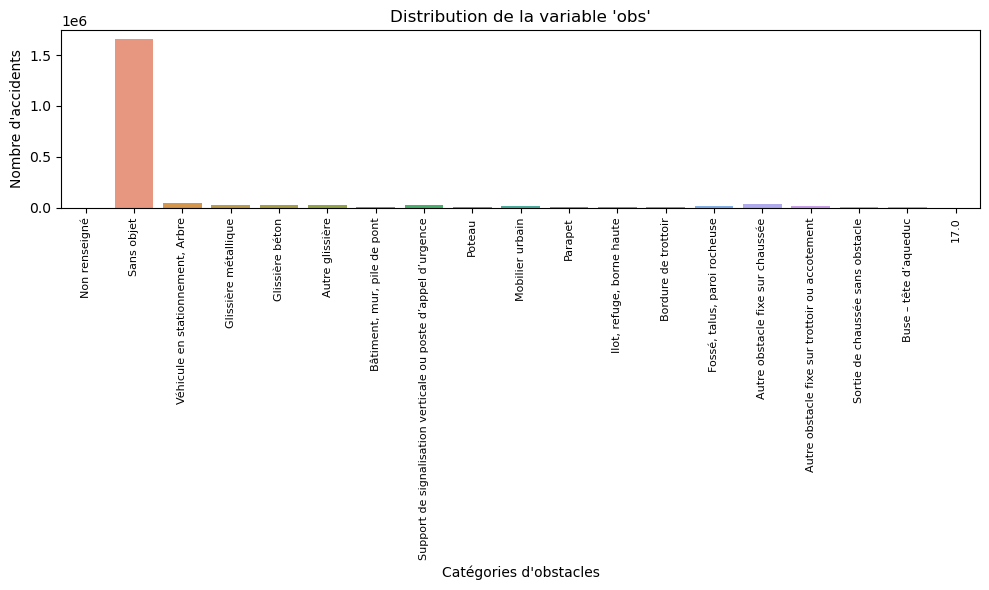

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='obs', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'obs'")
plt.xlabel('Catégories d\'obstacles')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()


La valeur 0 est définie comme "sans objet" et représente à elle seule 87% des occurrences.

<h2>Variable 'obsm' : Obstacle mobile heurté</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Aucun<br>
1 – Piéton<br>
2 – Véhicule<br>
4 – Véhicule sur rail<br>
5 – Animal domestique<br>
6 – Animal sauvage<br>
9 – Autre

In [49]:
correspondances_obsm = {
    -1.0 : "Non renseigné",
    0.0 : "Aucun",
    1.0 : "Piéton",
    2.0 : "Véhicule",
    4.0 : "Véhicule sur rail",
    5.0 : "Animal domestique",
    6.0 : "Animal sauvage",
    9.0 : "Autre"
}

vehicule['obsm'] = vehicule['obsm'].replace(correspondances_obsm)


In [50]:
vehicule['obsm'].value_counts()

Véhicule             1286308
Aucun                 399057
Piéton                194119
Autre                  27236
Animal sauvage          3721
Véhicule sur rail       1787
Animal domestique       1745
Non renseigné            151
Name: obsm, dtype: int64

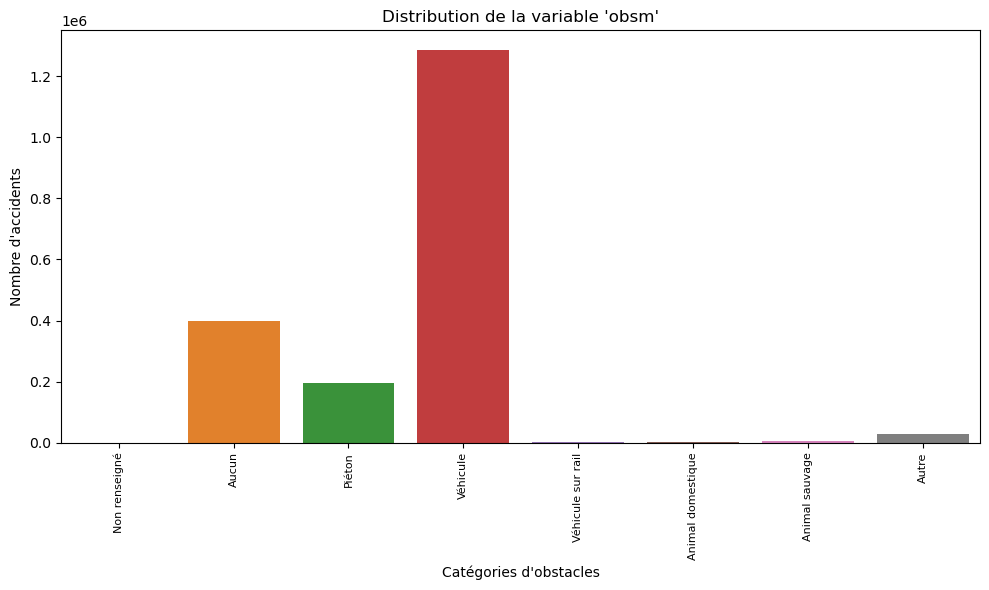

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='obsm', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'obsm'")
plt.xlabel('Catégories d\'obstacles')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()


In [52]:
pd.crosstab(vehicule.obs,vehicule.obsm)

obsm,Non renseigné,Aucun,Piéton,Véhicule,Véhicule sur rail,Animal domestique,Animal sauvage,Autre
obs,,,,,,,,
Non renseigné,61,5,8,21,0,0,0,1
Sans objet,86,203192,187472,1237275,1623,1566,3188,25718
"Véhicule en stationnement, Arbre",1,26148,3210,12226,21,21,15,268
Glissière métallique,0,25101,171,1934,4,26,135,97
Glissière béton,0,15173,116,6383,9,18,54,123
Autre glissière,0,16749,81,5476,8,15,36,103
"Bâtiment, mur, pile de pont",0,2055,42,583,6,1,11,33
Support de signalisation verticale ou poste d’appel d’urgence,0,17232,491,3335,2,21,19,100
Poteau,0,3087,80,1343,16,1,9,22


<b>Proposition</b> : fusionner les variables 'obs' et 'obsm' en une variable 'type d'obstacle heurté' en simplifiant la codification.

<h2>Variable 'choc' : Point de choc initial</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Aucun<br>
1 – Avant<br>
2 – Avant droit<br>
3 – Avant gauche<br>
4 – Arrière<br>
5 – Arrière droit<br>
6 – Arrière gauche<br>
7 – Côté droit<br>
8 – Côté gauche<br>
9 – Chocs multiples (tonneaux)<br>

In [53]:
correspondances_choc = {
    -1.0 : "Non renseigné",
    0.0 : "Aucun",
    1.0 : "Avant",
    2.0 : "Avant droit",
    3.0 : "Avant gauche",
    4.0 : "Arrière",
    5.0 : "Arrière droit",
    6.0 : "Arrière gauche",
    7.0 : "Côté droit",
    8.0 : "Côté gauche",
    9.0 : "Chocs multiples (tonneaux)"
    }

vehicule['choc'] = vehicule['choc'].replace(correspondances_choc)


In [54]:
vehicule['choc'].value_counts()

Avant                         704148
Avant gauche                  275589
Avant droit                   224072
Arrière                       181349
Côté gauche                   139484
Aucun                         127407
Côté droit                    116961
Arrière gauche                 64626
Arrière droit                  50935
Chocs multiples (tonneaux)     29802
Non renseigné                    132
Name: choc, dtype: int64

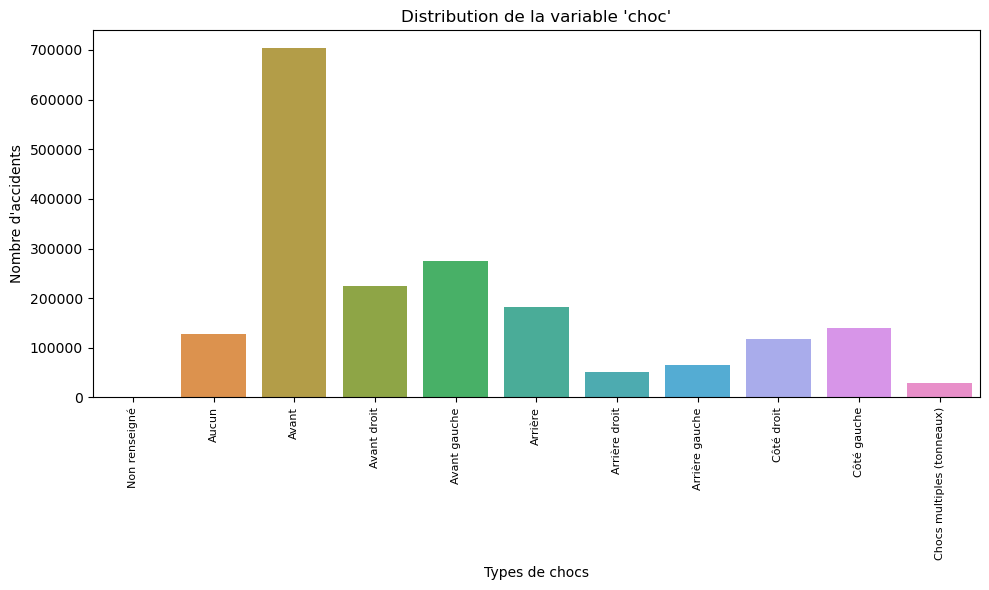

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='choc', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'choc'")
plt.xlabel('Types de chocs')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()


Une modalité prédomine, qui est le choc par l'avant. Les autres modalités ont des occurrences du même ordre de grandeur.

<h2>Variable 'manv' : Manoeuvre principale avant l’accident</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnue<br>
1 – Sans changement de direction<br>
2 – Même sens, même file<br>
3 – Entre 2 files<br>
4 – En marche arrière<br>
5 – A contresens<br>
6 – En franchissant le terre-plein central<br>
7 – Dans le couloir bus, dans le même sens<br>
8 – Dans le couloir bus, dans le sens inverse<br>
9 – En s’insérant<br>
10 – En faisant demi-tour sur la chaussée<br>
<b>Changeant de file</b><br>
11 – A gauche<br>
12 – A droite<br>
<b>Déporté</b><br>
13 – A gauche<br>
14 – A droite<br>
<b>Tournant</b><br>
15 – A gauche<br>
16 – A droite<br>
<b>Dépassant</b><br>
17 – A gauche<br>
18 – A droite<br>
<b>Divers</b><br>
19 – Traversant la chaussée<br>
20 – Manœuvre de stationnement<br>
21 – Manœuvre d’évitement<br>
22 – Ouverture de porte<br>
23 – Arrêté (hors stationnement)<br>
24 – En stationnement (avec occupants<br>
25 – Circulant sur trottoir<br>
26 – Autres manœuvres<br>

In [56]:
correspondances_manv = {
    -1.0 : "Non renseigné",
    0.0 : "Inconnue",
    1.0 : "Sans changement de direction",
    2.0 : "Même sens, même file",
    3.0 : "Entre 2 files",
    4.0 : "En marche arrière",
    5.0 : "A contresens",
    6.0 : "En franchissant le terre-plein central",
    7.0 : "Dans le couloir bus, dans le même sens",
    8.0 : "Dans le couloir bus, dans le sens inverse",
    9.0 : "En s’insérant",
    10.0 : "En faisant demi-tour sur la chaussée",
    11.0 : "Changeant de file - A gauche",
    12.0 : "Changeant de file - A droite",
    13.0 : "Déporté - A gauche",
    14.0 : "Déporté - A droite",
    15.0 : "Tournant - A gauche",
    16.0 : "Tournant - A droite",
    17.0 : "Dépassant - A gauche",
    18.0 : "Dépassant A droite",
    19.0 : "Traversant la chaussée",
    20.0 : "Manœuvre de stationnement",
    21.0 : "Manœuvre d’évitement",
    22.0 : "Ouverture de porte",
    23.0 : "Arrêté (hors stationnement)",
    24.0 : "En stationnement (avec occupants)",
    25.0 : "Circulant sur trottoir",
    26.0 : "Autres manœuvres"
}

vehicule['manv'] = vehicule['manv'].replace(correspondances_manv)


In [57]:
vehicule['manv'].value_counts()

Sans changement de direction                 824971
Même sens, même file                         221934
Tournant - A gauche                          166701
Inconnue                                     150328
Déporté - A gauche                            81512
Dépassant - A gauche                          65310
Arrêté (hors stationnement)                   50743
En s’insérant                                 45670
Tournant - A droite                           44553
Traversant la chaussée                        40293
Déporté - A droite                            32330
Manœuvre d’évitement                          29930
Changeant de file - A gauche                  20627
A contresens                                  19835
Changeant de file - A droite                  17916
En faisant demi-tour sur la chaussée          17557
En marche arrière                             15469
Entre 2 files                                 14704
Autres manœuvres                               9946
Dépassant A 

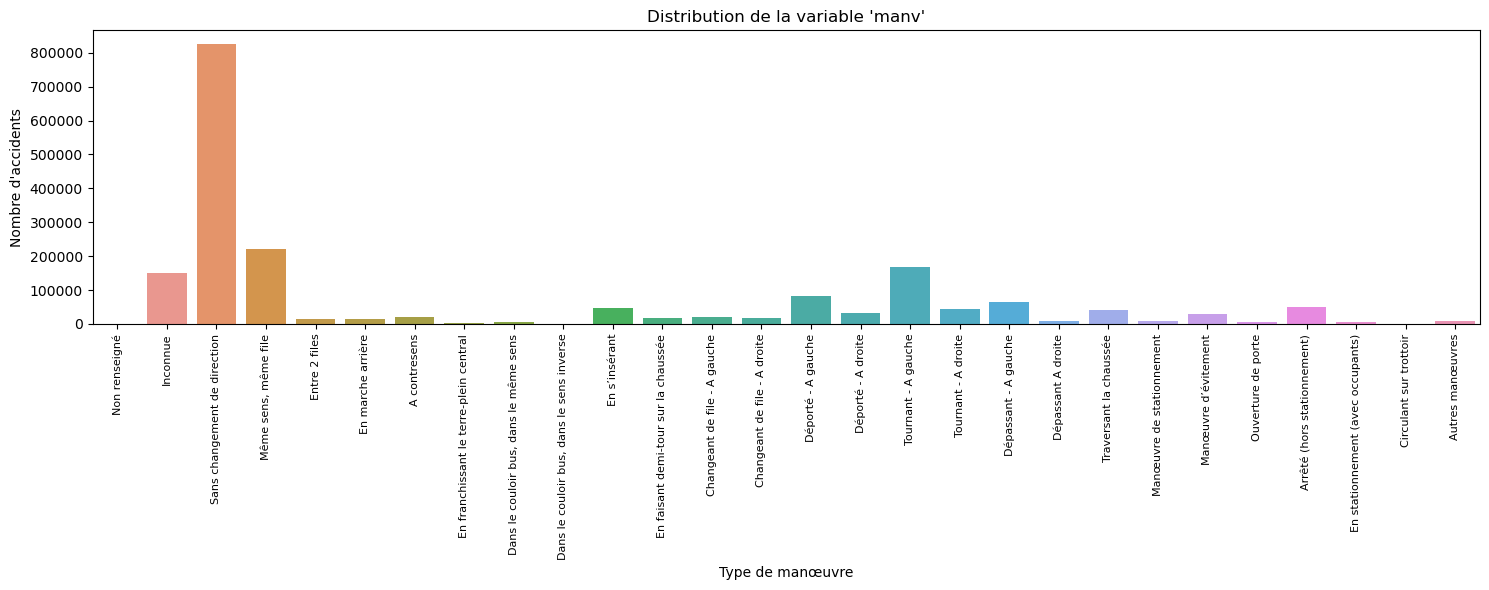

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='manv', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'manv'")
plt.xlabel('Type de manœuvre')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()


Une variable prédomine, le 'sans changement de direction'. Il semble possible de simplifier la codification en regroupant certaines manoeuvres.

<h2>Variable 'motor' : Type de motorisation du véhicule</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnue<br>
1 – Hydrocarbures<br>
2 – Hybride électrique<br>
3 – Electrique<br>
4 – Hydrogène<br>
5 – Humaine<br>
6 – Autre

In [59]:
correspondances_motor = {
    -1.0 : "Non renseigné",
    0.0 : "Inconnue",
    1.0 : "Hydrocarbures",
    2.0 : "Hybride électrique",
    3.0 : "Electrique",
    4.0 : "Hydrogène",
    5.0 : "Humaine",
    6.0 : "Autre"
}

vehicule['motor'] = vehicule['motor'].replace(correspondances_motor)


In [60]:
vehicule['motor'].value_counts()

Hydrocarbures         227148
Inconnue               24206
Humaine                14245
Electrique              6644
Hybride électrique      3129
Autre                   2868
Non renseigné            694
Hydrogène                157
Name: motor, dtype: int64

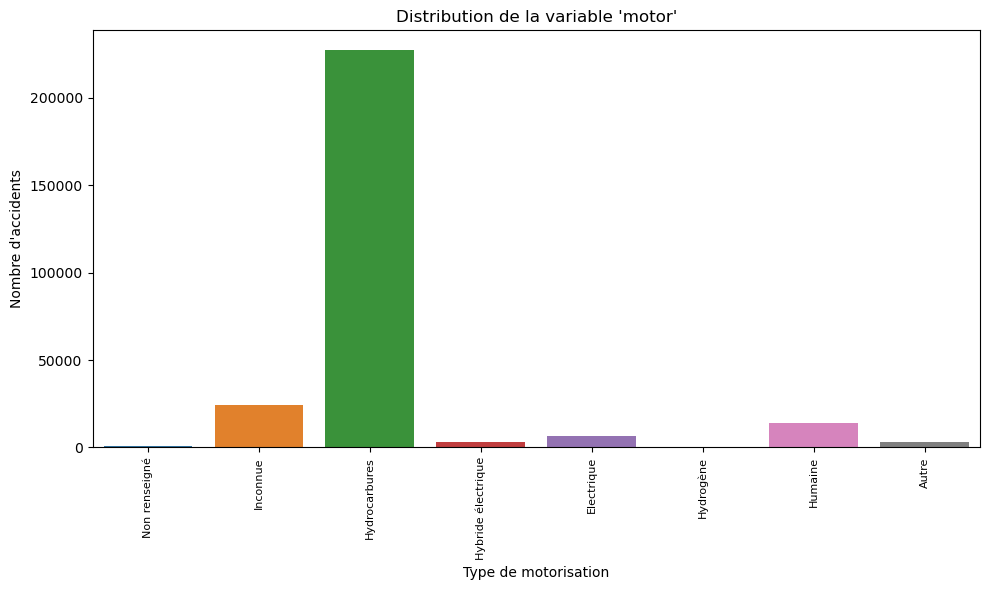

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='motor', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'motor'")
plt.xlabel('Type de motorisation')
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()


Il est pas étonnant de remarquer la prédominance des motors à 'hydrocarbures'

<h2>Variable 'occutc' : Nombre d’occupants dans le transport en commun.</h2>

In [62]:
vehicule['occutc'].value_counts()

0.0      1624683
1.0         7079
2.0         1033
10.0         654
3.0          544
          ...   
97.0           1
73.0           1
102.0          1
82.0           1
78.0           1
Name: occutc, Length: 124, dtype: int64

0 représente plus de 80% des valeurs.

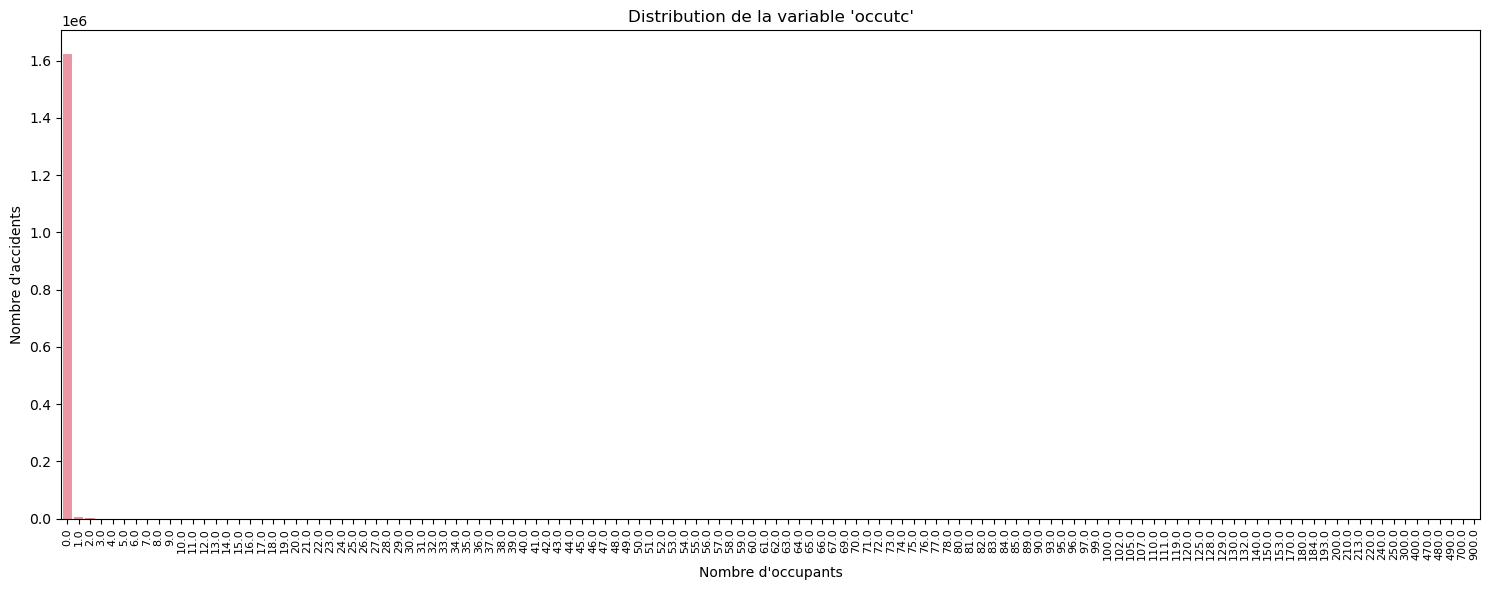

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='occutc', data=vehicule, ax=ax)

plt.title("Distribution de la variable 'occutc'")
plt.xlabel("Nombre d'occupants")
plt.ylabel("Nombre d'accidents")

plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.show()

<h2>Variable 'num_veh' : Numéro d'ordre du véhicule dans l'accident</h2>

Il n'y a aucune description de la variable 'num_veh' dans la documentation fournie avec le jeu de données. À première vue, cette variable semble représenter le numéro d'ordre du véhicule dans l'accident, mais nous n'avons aucune information pour déterminer s'il s'agit simplement d'un ordre d'enregistrement ou s'il a une signification particulière. Le caractère alphabétique pourrait éventuellement représenter un type de véhicule.<br>


<h1>Nettoyage du jeu de donnée</h1>

Il y a trop de valeurs manquantes dans la variable 'motor'. elle va être supprimée.

In [64]:
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 14 columns):
 #   Column       Dtype   
---  ------       -----   
 0   num_acc      int64   
 1   senc         category
 2   catv         object  
 3   occutc       float64 
 4   obs          category
 5   obsm         category
 6   choc         category
 7   manv         category
 8   num_veh      object  
 9   annee        object  
 10  id_vehicule  object  
 11  motor        category
 12  catv_Label   category
 13  permis       category
dtypes: category(8), float64(1), int64(1), object(4)
memory usage: 102.3+ MB


In [65]:
#vehicule.drop('motor',axis=1, inplace=True)

In [66]:
#vehicule.drop('occutc',axis=1, inplace=True)

In [67]:
#vehicule.drop('senc',axis=1, inplace=True)

In [68]:
# columns = ['obs', 'obsm', 'choc', 'manv']
# for col in columns:
    # vehicule[col].fillna(vehicule[col].mode()[0], inplace=True)

# Annulation du remplacement des NaN par le mode pour ne pas influer sur les prédictions (suite aux conseils entendues par une prof de Datascientest dans un cours de Deep Learning)

In [69]:
vehicule.drop(['catv', 'permis'], axis=1, inplace=True)

In [70]:
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype   
---  ------       -----   
 0   num_acc      int64   
 1   senc         category
 2   occutc       float64 
 3   obs          category
 4   obsm         category
 5   choc         category
 6   manv         category
 7   num_veh      object  
 8   annee        object  
 9   id_vehicule  object  
 10  motor        category
 11  catv_Label   category
dtypes: category(7), float64(1), int64(1), object(3)
memory usage: 85.8+ MB


In [71]:
vehicule.isnull().sum()

num_acc              0
senc               272
occutc          276834
obs               1006
obsm               778
choc               397
manv               468
num_veh              0
annee                0
id_vehicule    1635811
motor          1635811
catv_Label           9
dtype: int64

In [72]:
vehicule.duplicated().sum()

0

Il n'y a pas de doublons dans ce jeu de données.

#vehicule_pour_fusion = vehicule

In [73]:
vehicule.to_csv('vehicule_pour_fusion.csv', index=False)

In [74]:
vehicule.catv_Label.cat.categories

Index(['Autobus et autocars', 'Autre véhicule', 'Bicyclette',
       'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
       'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
       'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
       'Engins de déplacement personnels (EDP) sans moteur (ex : skateboards, roller, trottinette)',
       'Engins de déplacement personnels (EDP) à moteur (ex: trotinette)',
       'Indéterminable', 'Poids lourds (PL) et camions', 'Quad',
       'Tracteurs agricoles et engins spéciaux', 'Tracteurs routiers', 'Train',
       'Tramway', 'Voitures légères (VL) avec carane ou remorque tractée',
       'Voitures légères (VL) seule', 'Voiturette',
       'Véhicules utilitaires légers (VU)',
       'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
       'Vélo avec assistance électrique (VAE)'],
      dtype='object')

In [65]:
import os
print(os.listdir())

['description-des-bases-de-donnees-annuelles-2021 (1).pdf', 'usagers.csv', '.DS_Store', 'lieux11.csv', 'lieux.csv', 'carac1.csv.zip', 'COPIE - USAGERS - Exploration_données.ipynb', 'lieux-2021.csv', 'usag5.csv', 'lieux-2020.csv', 'usag5.csv.zip', 'usag6.csv', 'donnees_agregees_de_2005_a_2010.csv', 'caracteristiques.csv', 'vehicules.csv', 'lieux-2019.csv', 'carac1.csv', 'vehicule_exploration_données.ipynb', 'lieux11.csv.zip', 'Caracteristiques_ajuste.ipynb', 'vehicule_pour_fusion.csv', '.ipynb_checkpoints', 'Lieux_accidentscirculation.ipynb', 'UsagersLieux.ipynb', 'Vehicule_Prepa_fusion2.ipynb']


In [66]:
from google.colab import files
vehicule_pour_fusion.to_csv('vC', index=False)
files.download('vehicule_pour_fusion.csv')

ModuleNotFoundError: No module named 'google.colab'

** STOP ** NE PAS PRENDRE EN COMPTE LIGNE CI-DESSOUS POUR LA FUSION **

In [67]:
vehicule[['catv','obs','obsm','choc','manv']] = vehicule[['catv','obs','obsm','choc','manv']].astype('object')
vehicule.info()

KeyError: "['catv'] not in index"

<h1>Relation entre les variables</h1>

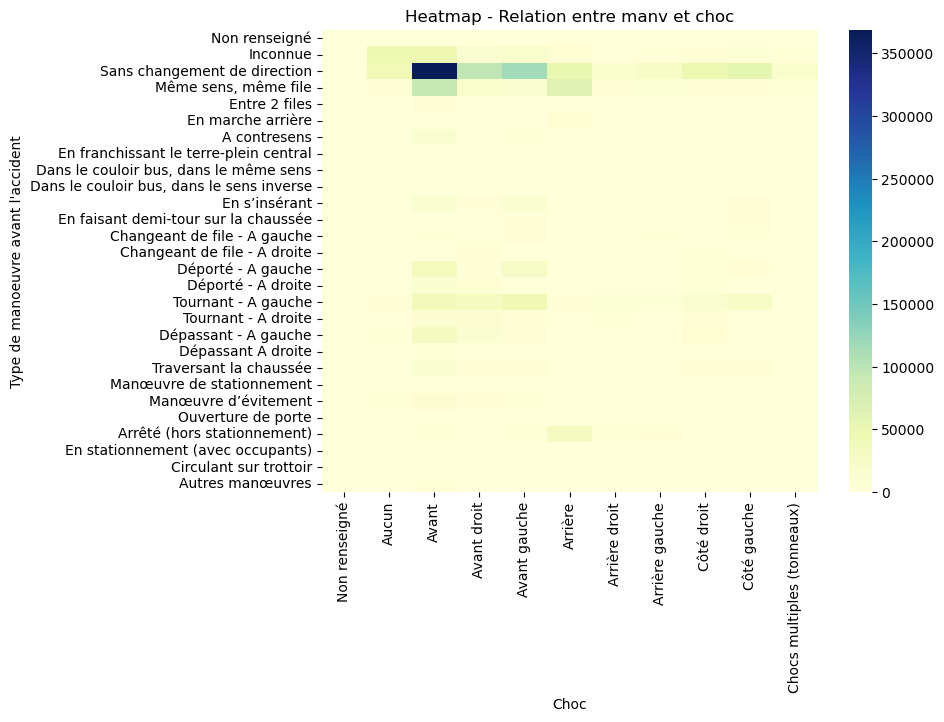

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [68]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['choc'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et choc')
plt.xlabel('Choc')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

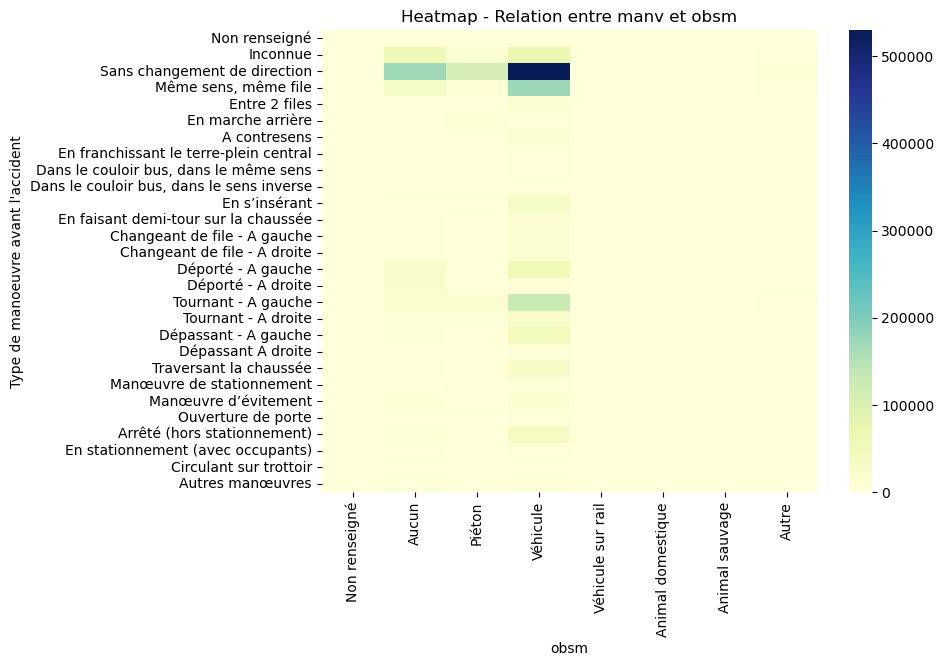

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [69]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['obsm'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et obsm')
plt.xlabel('obsm')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

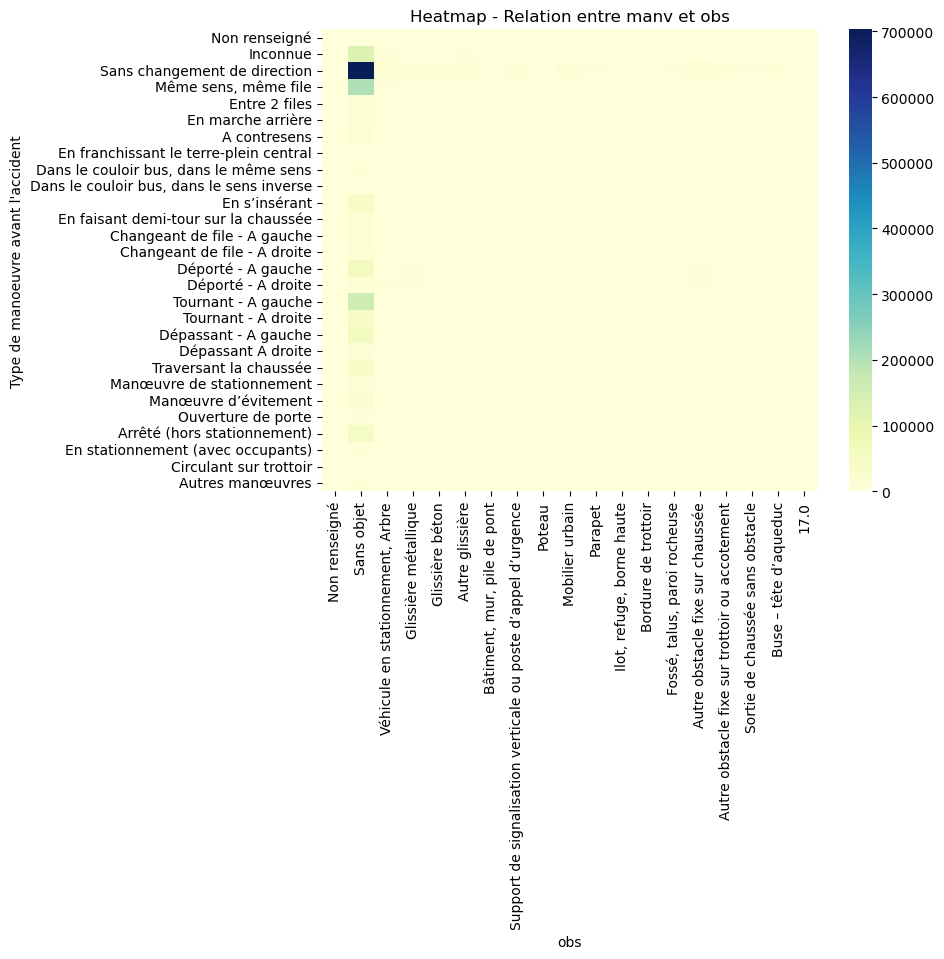

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [70]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['obs'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et obs')
plt.xlabel('obs')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

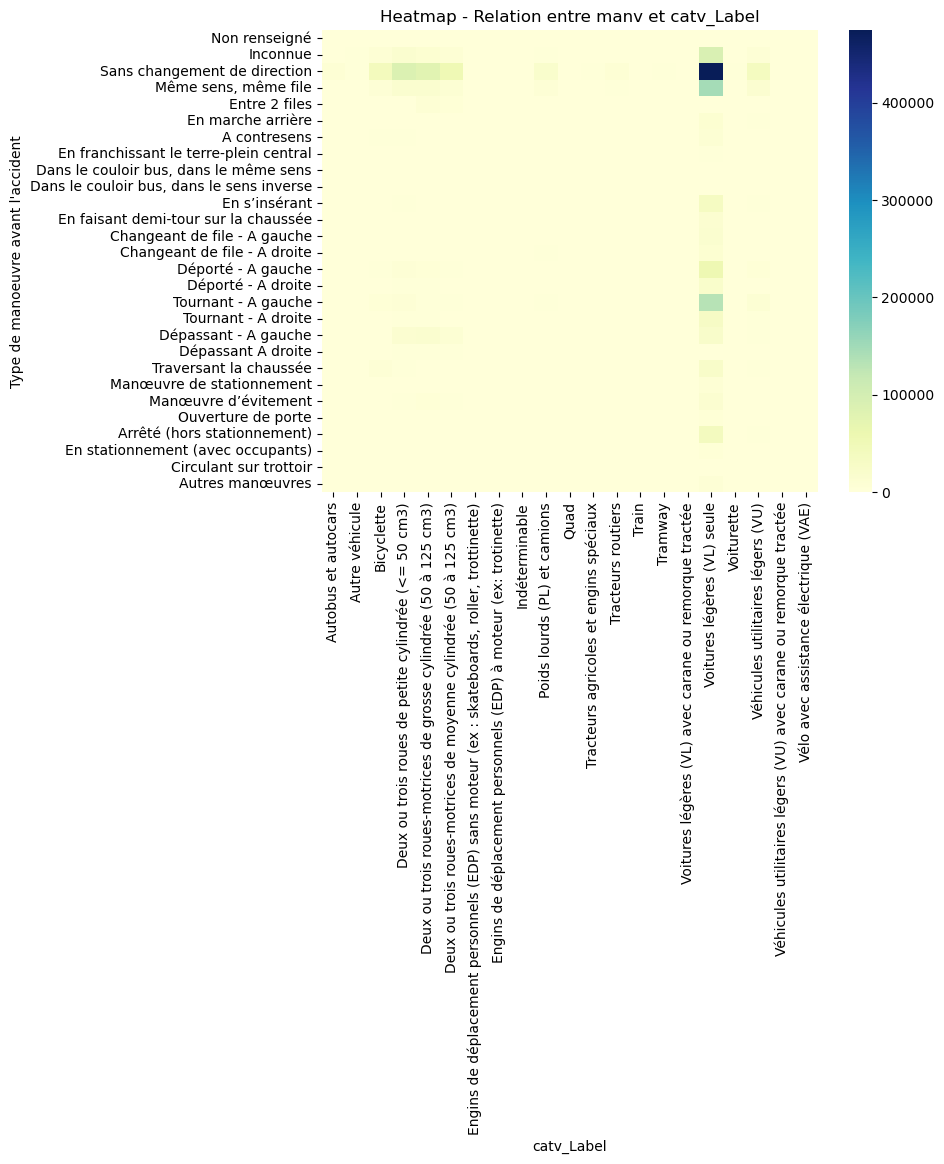

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [71]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['catv_Label'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et catv_Label')
plt.xlabel('catv_Label')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

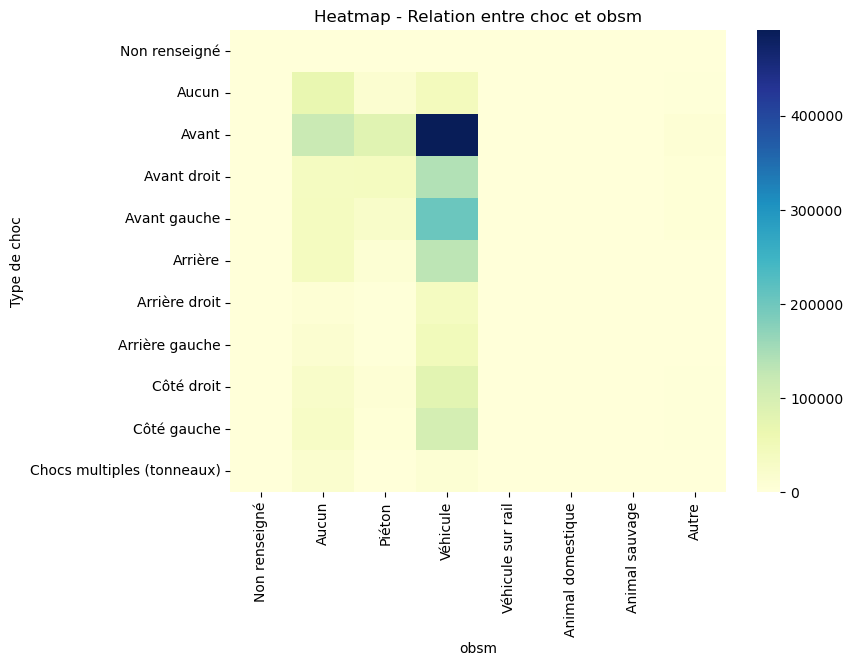

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [72]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['obsm'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre choc et obsm')
plt.xlabel('obsm')
plt.ylabel("Type de choc")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

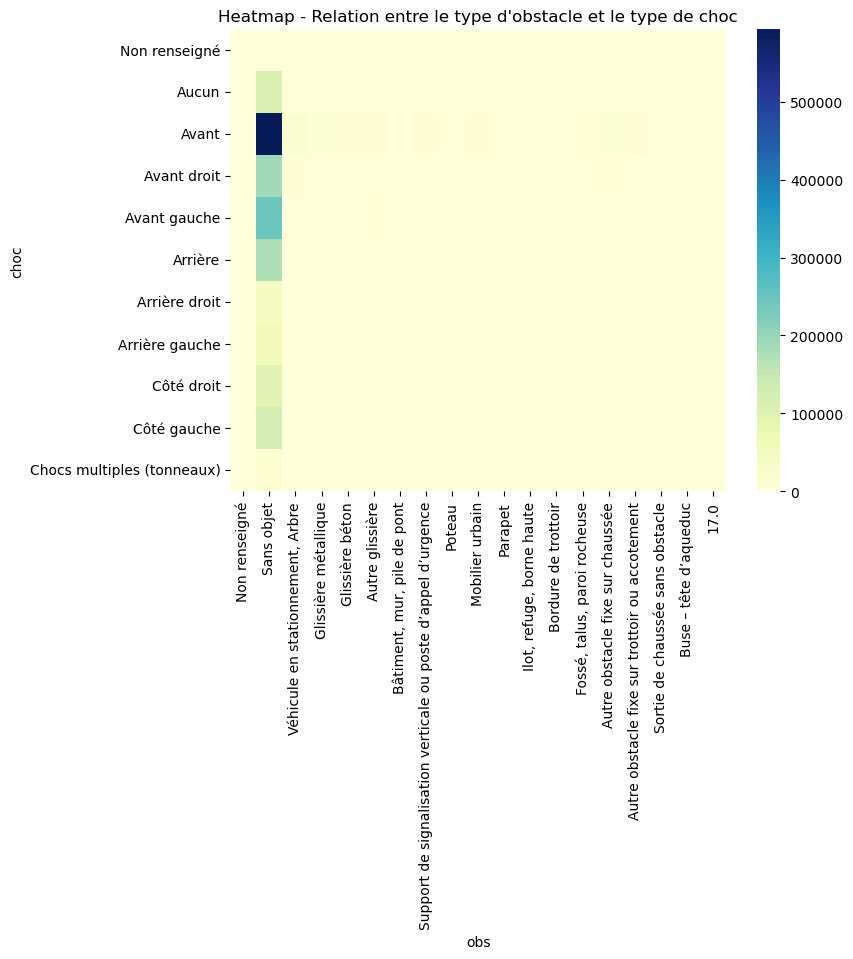

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [73]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['obs'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle et le type de choc")
plt.xlabel('obs')
plt.ylabel('choc')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

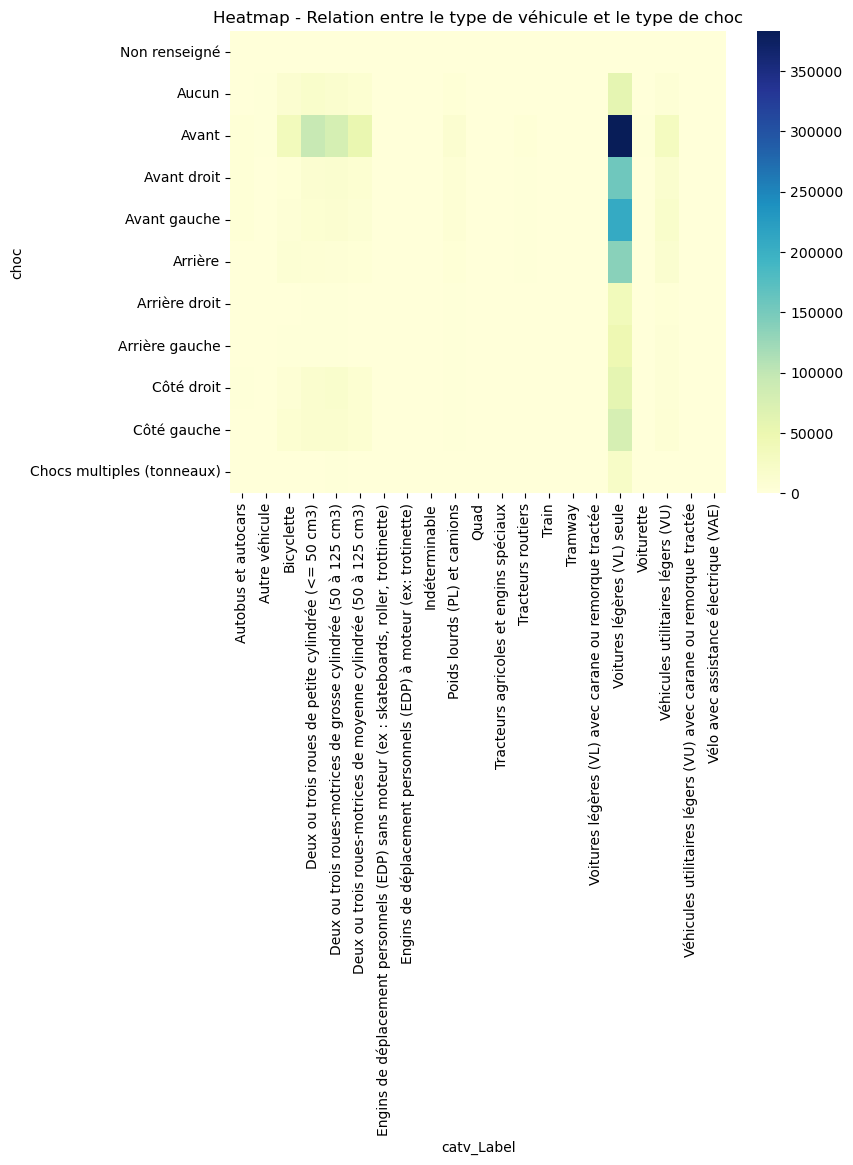

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [74]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['catv_Label'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type de véhicule et le type de choc")
plt.xlabel('catv_Label')
plt.ylabel('choc')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

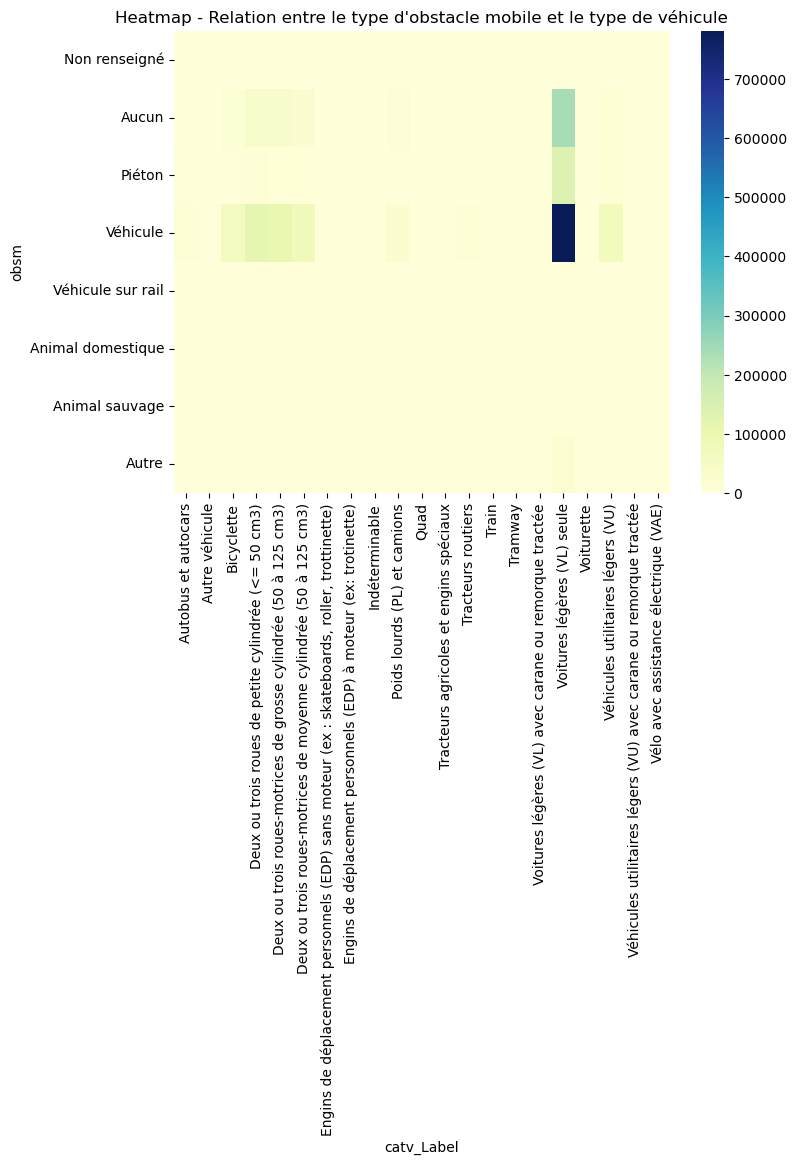

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [75]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['obsm'], vehicule['catv_Label'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle mobile et le type de véhicule")
plt.xlabel('catv_Label')
plt.ylabel('obsm')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

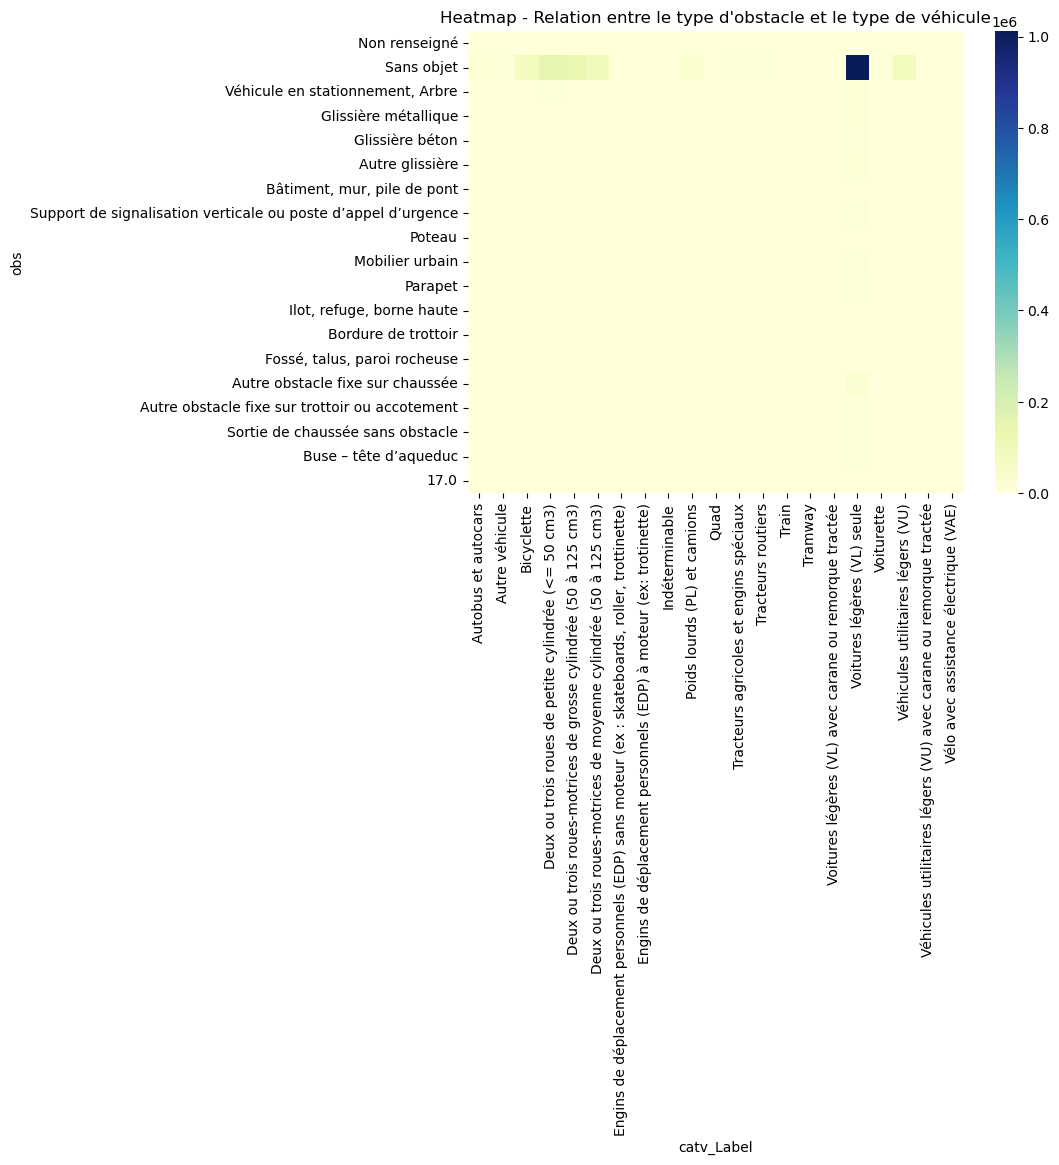

Résultats du test du Chi-carré:
p-value: 0.0


NameError: name 'fusion' is not defined

In [76]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['obs'], vehicule['catv_Label'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle et le type de véhicule")
plt.xlabel('catv_Label')
plt.ylabel('obs')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

<h1>Relation avec la variable cible</h1>

In [77]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion['choc'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre grav et choc')
plt.xlabel('Choc')
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

NameError: name 'fusion' is not defined

In [78]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion[fusion['obs'] != 0.0].obs)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type d'obstacle")
plt.xlabel("type d'obstacle")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

NameError: name 'fusion' is not defined

In [79]:
# Création d'une table croisée entre les variables 'obs' et 'grav'
cross_table = pd.crosstab(fusion['obs'], fusion['grav'], normalize='index')

# Affichage du graphique à barres
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout des titres et des étiquettes des axes
plt.title("Proportion des gravités d'accidents selon le type d'obstacle fixe")
plt.xlabel("type d'obstacle fixe")
plt.ylabel("Proportion du niveau de gravité")

# Affichage de la légende
plt.legend(title='Gravité')

# Affichage du graphique
plt.show()

NameError: name 'fusion' is not defined

In [80]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.obsm)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type d'obstacle mobile")
plt.xlabel("type d'obstacle mobile")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

NameError: name 'fusion' is not defined

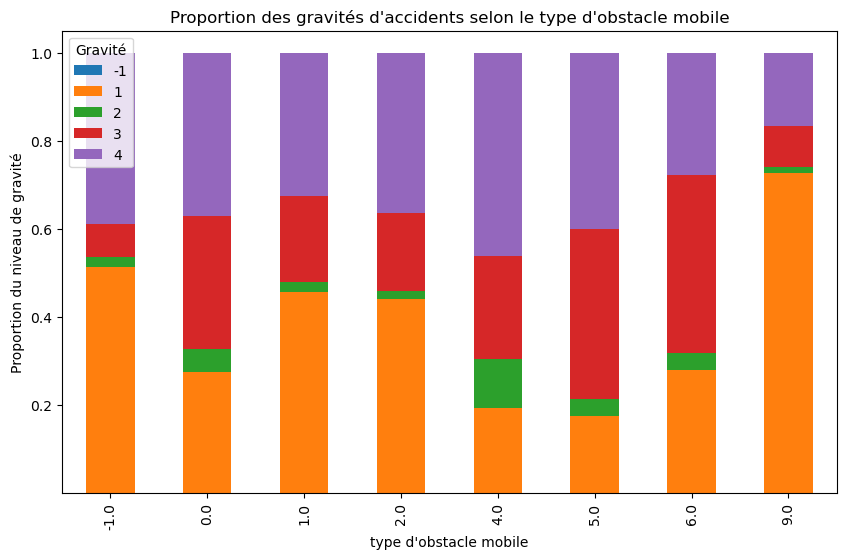

In [ ]:
# Création d'une table croisée entre les variables 'obs' et 'grav'
cross_table = pd.crosstab(fusion['obsm'], fusion['grav'], normalize='index')

# Affichage du graphique à barres
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout des titres et des étiquettes des axes
plt.title("Proportion des gravités d'accidents selon le type d'obstacle mobile")
plt.xlabel("type d'obstacle mobile")
plt.ylabel("Proportion du niveau de gravité")

# Affichage de la légende
plt.legend(title='Gravité')

# Affichage du graphique
plt.show()

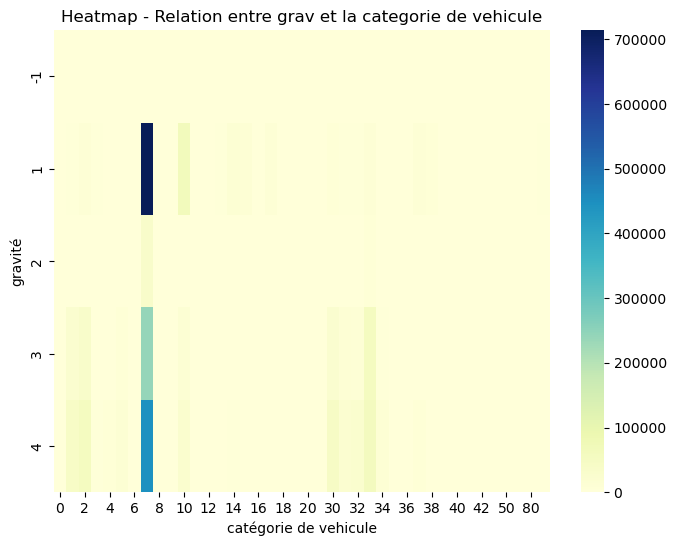

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.20176816122069585


In [ ]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.catv)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et la categorie de vehicule")
plt.xlabel("catégorie de vehicule")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

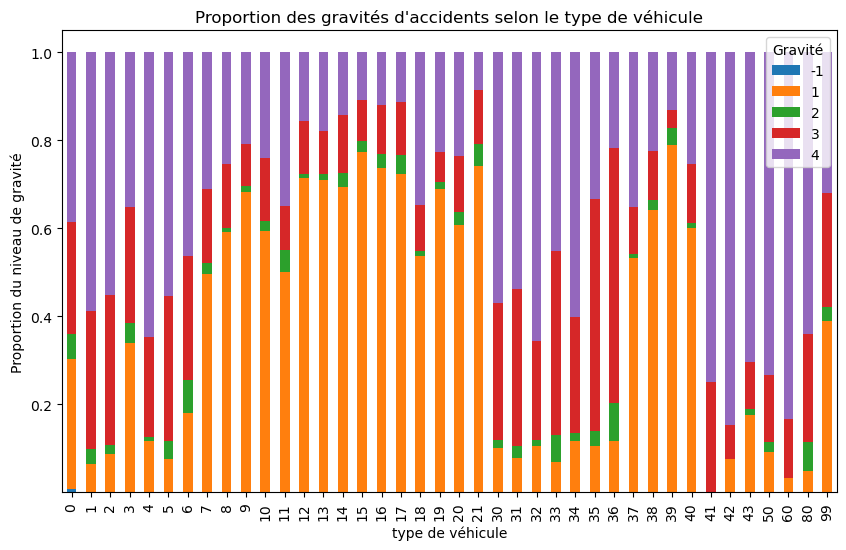

In [ ]:
# Création d'une table croisée entre les variables 'obs' et 'grav'
cross_table = pd.crosstab(fusion['catv'], fusion['grav'], normalize='index')

# Affichage du graphique à barres
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout des titres et des étiquettes des axes
plt.title("Proportion des gravités d'accidents selon le type de véhicule")
plt.xlabel("type de véhicule")
plt.ylabel("Proportion du niveau de gravité")

# Affichage de la légende
plt.legend(title='Gravité')

# Affichage du graphique
plt.show()

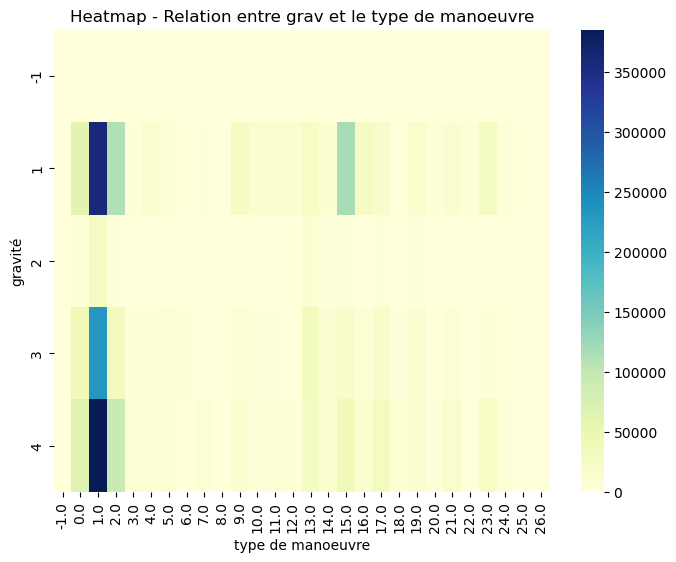

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.14687888756455922


In [ ]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.manv)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type de manoeuvre")
plt.xlabel("type de manoeuvre")
plt.ylabel('gravité')
plt.show()

# Test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

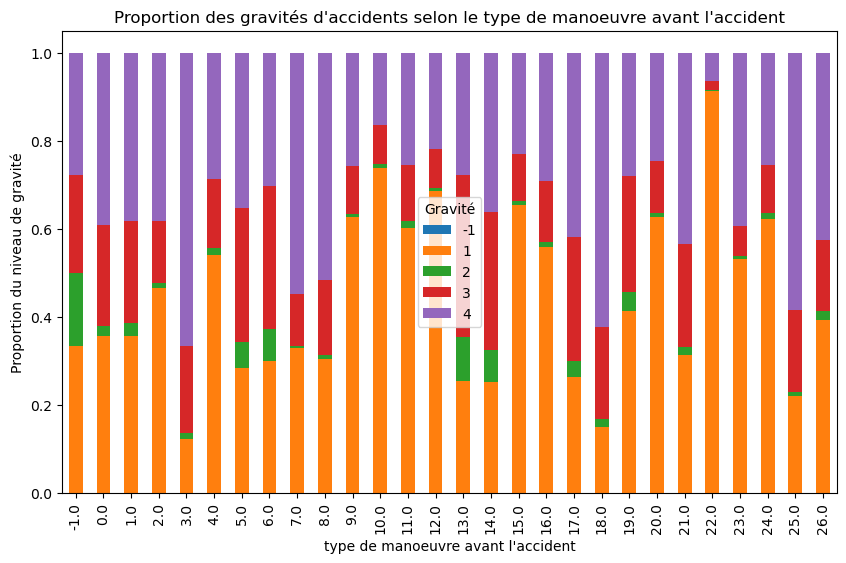

In [ ]:
# Création d'une table croisée entre les variables 'obs' et 'grav'
cross_table = pd.crosstab(fusion['manv'], fusion['grav'], normalize='index')

# Affichage du graphique à barres
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajout des titres et des étiquettes des axes
plt.title("Proportion des gravités d'accidents selon le type de manoeuvre avant l'accident")
plt.xlabel("type de manoeuvre avant l'accident")
plt.ylabel("Proportion du niveau de gravité")

# Affichage de la légende
plt.legend(title='Gravité')

# Affichage du graphique
plt.show()

<AxesSubplot:>

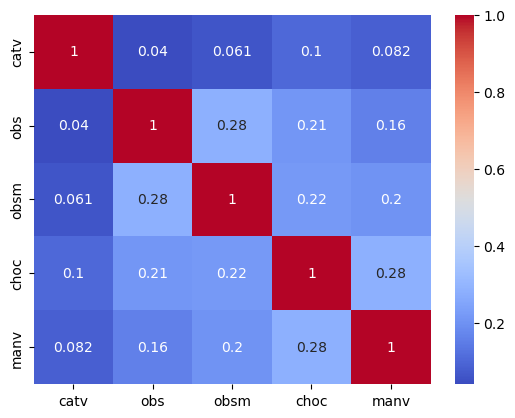

In [ ]:
relation_variable = vehicule[['catv','obs','obsm','choc','manv']]
# Calculer la matrice de corrélation avec le coefficient de corrélation V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, c = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((r - 1) * (c - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    ccorr = c - ((c - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((rcorr - 1), (ccorr - 1)))

corr_matrix = pd.DataFrame(index=relation_variable.columns, columns=relation_variable.columns)

for i in range(len(relation_variable.columns)):
    for j in range(i, len(relation_variable.columns)):
        corr = cramers_v(relation_variable.iloc[:, i], relation_variable.iloc[:, j])
        corr_matrix.iloc[i, j] = corr
        corr_matrix.iloc[j, i] = corr

# Convertir les valeurs de la matrice de corrélation en nombres
corr_matrix = corr_matrix.astype(float)
# Afficher la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


<h1>Représentation graphique</h1>

Nombre moyen de véhicule par accident

In [ ]:
nb_veh_acc = vehicule.groupby('num_acc')['num_acc'].agg(['count'])

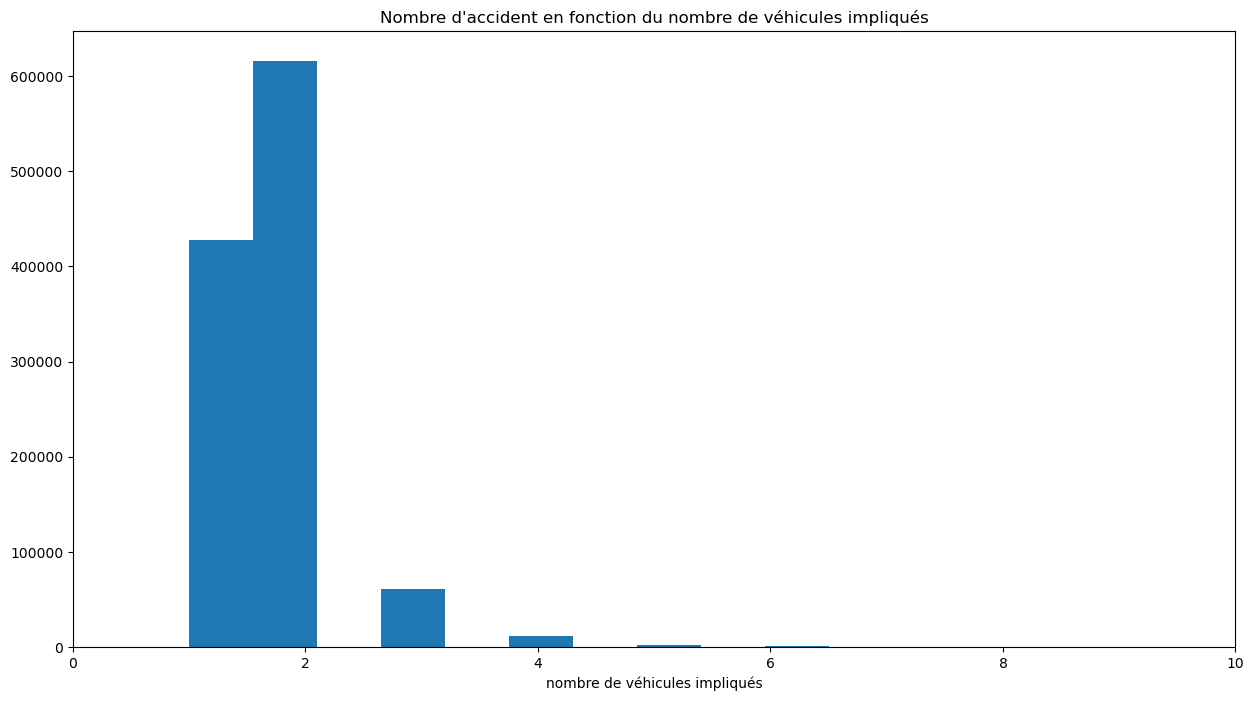

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(nb_veh_acc['count'], bins = 100)
plt.xlim([0, 10])
plt.xlabel('nombre de véhicules impliqués')
plt.title("Nombre d'accident en fonction du nombre de véhicules impliqués");

In [81]:
vehicule.dtypes

num_acc           int64
senc           category
occutc          float64
obs            category
obsm           category
choc           category
manv           category
num_veh          object
annee            object
id_vehicule      object
motor          category
catv_Label       object
permis           object
dtype: object

export du fichier pour fusion

In [ ]:
vehicule.to_csv(r'C:\Users\maill\Documents\GitHub\SARA\data\vehicule_nettoye.csv')